In [1]:
# loading libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import where
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans 
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel(r'C:\Users\ACER\Downloads\DSBA\Capstone\Churn\Customer Churn Data.xlsx', sheet_name = 'Data for DSBA')
data.head()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,159.93,Mobile
1,20001,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,120.9,Mobile
2,20002,1,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6,1.0,14,0,3,NaN,Mobile
3,20003,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134.07,Mobile
4,20004,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,129.6,Mobile


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  object 
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  object 
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11158 non-null  object 
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

In [4]:
data.shape

(11260, 19)

In [5]:
data.describe()

,AccountID,Churn,City_Tier,CC_Contacted_LY,Service_Score,CC_Agent_Score,Complain_ly
count,11260.00000,11260.000000,11148.000000,11158.000000,11162.000000,11144.000000,10903.000000
mean,25629.50000,0.168384,1.653929,17.867091,2.902526,3.066493,0.285334
std,3250.62635,0.374223,0.915015,8.853269,0.725584,1.379772,0.451594
min,20000.00000,0.000000,1.000000,4.000000,0.000000,1.000000,0.000000
25%,22814.75000,0.000000,1.000000,11.000000,2.000000,2.000000,0.000000
50%,25629.50000,0.000000,1.000000,16.000000,3.000000,3.000000,0.000000
75%,28444.25000,0.000000,3.000000,23.000000,3.000000,4.000000,1.000000
max,31259.00000,1.000000,3.000000,132.000000,5.000000,5.000000,1.000000


In [6]:
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
AccountID,11260.0,NaN,NaN,NaN,25629.5,3250.62635,20000.0,22814.75,25629.5,28444.25,31259.0
Churn,11260.0,NaN,NaN,NaN,0.168384,0.374223,0.0,0.0,0.0,0.0,1.0
Tenure,11158.0,38.0,1.0,1351.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City_Tier,11148.0,NaN,NaN,NaN,1.653929,0.915015,1.0,1.0,1.0,3.0,3.0
CC_Contacted_LY,11158.0,NaN,NaN,NaN,17.867091,8.853269,4.0,11.0,16.0,23.0,132.0
Payment,11151,5,Debit Card,4587,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,11152,4,Male,6328,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Service_Score,11162.0,NaN,NaN,NaN,2.902526,0.725584,0.0,2.0,3.0,3.0,5.0
Account_user_count,11148.0,7.0,4.0,4569.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
account_segment,11163,7,Super,4062,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data.isnull().sum()

AccountID                    0
Churn                        0
Tenure                     102
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         112
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              102
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

In [8]:
data.duplicated().sum()

0

In [9]:
pd.DataFrame(data = [data.kurtosis(), data.skew()], index=['Kurtosis','Skewness']).T.round(2)

,Kurtosis,Skewness
AccountID,-1.20,0.00
Churn,1.14,1.77
City_Tier,-1.40,0.74
CC_Contacted_LY,8.23,1.42
Service_Score,-0.67,0.00
CC_Agent_Score,-1.12,-0.14
Complain_ly,-1.10,0.95


In [10]:
data.std()

AccountID          3250.626350
Churn                 0.374223
City_Tier             0.915015
CC_Contacted_LY       8.853269
Service_Score         0.725584
CC_Agent_Score        1.379772
Complain_ly           0.451594
dtype: float64

In [11]:
data.groupby(["Churn"]).count()

,AccountID,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
Churn,,,,,,,,,,,,,,,,,,
0,9364,9285,9269,9280,9277,9278,9282,9271,9285,9270,9184,9278,9065,9364,9364,9071,8978,9185
1,1896,1873,1879,1878,1874,1874,1880,1877,1878,1874,1864,1880,1838,1896,1896,1832,1811,1854


## Treating Data

In [12]:
# Treating Tenure Variable
data["Tenure"].unique()

array([4, 0, 2, 13, 11, '#', 9, 99, 19, 20, 14, 8, 26, 18, 5, 30, 7, 1,
       23, 3, 29, 6, 28, 24, 25, 16, 10, 15, 22, nan, 27, 12, 21, 17, 50,
       60, 31, 51, 61], dtype=object)

In [13]:
data['Tenure'] = data['Tenure'].replace('#',np.NaN)
data['Tenure'] = data['Tenure'].astype('Int64')

In [14]:
data['Tenure'] = data['Tenure'].fillna(data['Tenure'].median())

In [15]:
data["Tenure"].unique()

<IntegerArray>
[ 4,  0,  2, 13, 11,  9, 99, 19, 20, 14,  8, 26, 18,  5, 30,  7,  1, 23,  3,
 29,  6, 28, 24, 25, 16, 10, 15, 22, 27, 12, 21, 17, 50, 60, 31, 51, 61]
Length: 37, dtype: Int64

In [16]:
# Treating City_Tier Variable
data["City_Tier"].unique()

array([ 3.,  1., nan,  2.])

In [17]:
data['City_Tier'] = data['City_Tier'].fillna(data['City_Tier'].mode()[0])
data['City_Tier'] = data['City_Tier'].astype('Int64')

In [18]:
data["City_Tier"].unique()

<IntegerArray>
[3, 1, 2]
Length: 3, dtype: Int64

In [19]:
# Treating CC_Contacted_LY Variable
data["CC_Contacted_LY"].unique()

array([  6.,   8.,  30.,  15.,  12.,  22.,  11.,   9.,  31.,  18.,  13.,
        20.,  29.,  28.,  26.,  14.,  10.,  25.,  27.,  17.,  23.,  33.,
        19.,  35.,  24.,  16.,  32.,  21.,  nan,  34.,   5.,   4., 126.,
         7.,  36., 127.,  42.,  38.,  37.,  39.,  40.,  41., 132.,  43.,
       129.])

In [20]:
data['CC_Contacted_LY'] = data['CC_Contacted_LY'].fillna(data['CC_Contacted_LY'].median())
data['CC_Contacted_LY'] = data['CC_Contacted_LY'].astype('Int64')

In [21]:
data["CC_Contacted_LY"].unique()

<IntegerArray>
[  6,   8,  30,  15,  12,  22,  11,   9,  31,  18,  13,  20,  29,  28,  26,
  14,  10,  25,  27,  17,  23,  33,  19,  35,  24,  16,  32,  21,  34,   5,
   4, 126,   7,  36, 127,  42,  38,  37,  39,  40,  41, 132,  43, 129]
Length: 44, dtype: Int64

In [22]:
# Treating Payment Variable
data["Payment"].unique()

array(['Debit Card', 'UPI', 'Credit Card', 'Cash on Delivery', 'E wallet',
       nan], dtype=object)

In [23]:
data['Payment'] = data['Payment'].fillna(data['Payment'].mode()[0])

In [24]:
data['Payment'] = data['Payment'].replace('Debit Card','1')
data['Payment'] = data['Payment'].replace('UPI','2')
data['Payment'] = data['Payment'].replace('Credit Card','3')
data['Payment'] = data['Payment'].replace('Cash on Delivery','4')
data['Payment'] = data['Payment'].replace('E wallet','5')

In [25]:
data["Payment"].unique()

array(['1', '2', '3', '4', '5'], dtype=object)

In [26]:
data['Payment'] = data['Payment'].astype('float64')
data['Payment'] = data['Payment'].astype('Int64')

In [27]:
data["Payment"].unique()

<IntegerArray>
[1, 2, 3, 4, 5]
Length: 5, dtype: Int64

In [28]:
# Treating Gender Variable
data["Gender"].unique()

array(['Female', 'Male', 'F', nan, 'M'], dtype=object)

In [29]:
data['Gender'] = data['Gender'].replace('Female','1')
data['Gender'] = data['Gender'].replace('F','1')
data['Gender'] = data['Gender'].replace('Male','2')
data['Gender'] = data['Gender'].replace('M','2')

In [30]:
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data['Gender'] = data['Gender'].astype('float64')
data['Gender'] = data['Gender'].astype('Int64')

In [31]:
data["Gender"].unique()

<IntegerArray>
[1, 2]
Length: 2, dtype: Int64

In [32]:
# Treating Service_Score Variable
data["Service_Score"].unique()

array([ 3.,  2.,  1., nan,  0.,  4.,  5.])

In [33]:
data['Service_Score'] = data['Service_Score'].fillna(data['Service_Score'].mode()[0])
data['Service_Score'] = data['Service_Score'].astype('int64')

In [34]:
data["Service_Score"].unique()

array([3, 2, 1, 0, 4, 5], dtype=int64)

In [35]:
# Treating Account_user_count Variable
data["Account_user_count"].unique()

array([3, 4, nan, 5, 2, '@', 1, 6], dtype=object)

In [36]:
data['Account_user_count'] = data['Account_user_count'].replace('@',np.NaN)

In [37]:
data['Account_user_count'] = data['Account_user_count'].fillna(data['Account_user_count'].median())
data['Account_user_count'] = data['Account_user_count'].astype('Int64')

In [38]:
data["Account_user_count"].unique()

<IntegerArray>
[3, 4, 5, 2, 1, 6]
Length: 6, dtype: Int64

In [39]:
# Treating Account_user_count Variable
data["account_segment"].unique()

array(['Super', 'Regular Plus', 'Regular', 'HNI', 'Regular +', nan,
       'Super Plus', 'Super +'], dtype=object)

In [40]:
data['account_segment'] = data['account_segment'].replace('Super','1')
data['account_segment'] = data['account_segment'].replace('Regular Plus','2')
data['account_segment'] = data['account_segment'].replace('Regular +','2')
data['account_segment'] = data['account_segment'].replace('Regular','3')
data['account_segment'] = data['account_segment'].replace('HNI','4')
data['account_segment'] = data['account_segment'].replace('Super Plus','5')
data['account_segment'] = data['account_segment'].replace('Super +','5')

In [41]:
data['account_segment'] = data['account_segment'].fillna(data['account_segment'].mode()[0])
data['account_segment'] = data['account_segment'].astype('float64')
data['account_segment'] = data['account_segment'].astype('Int64')

In [42]:
data["account_segment"].unique()

<IntegerArray>
[1, 2, 3, 4, 5]
Length: 5, dtype: Int64

In [43]:
# Treating Account_user_count Variable
data["CC_Agent_Score"].unique()

array([ 2.,  3.,  5.,  4., nan,  1.])

In [44]:
data['CC_Agent_Score'] = data['CC_Agent_Score'].fillna(data['CC_Agent_Score'].mode()[0])
data['CC_Agent_Score'] = data['CC_Agent_Score'].astype('Int64')

In [45]:
data["CC_Agent_Score"].unique()

<IntegerArray>
[2, 3, 5, 4, 1]
Length: 5, dtype: Int64

In [46]:
# Treating Marital_Status Variable
data["Marital_Status"].unique()

array(['Single', 'Divorced', 'Married', nan], dtype=object)

In [47]:
data['Marital_Status'] = data['Marital_Status'].fillna(data['Marital_Status'].mode()[0])

In [48]:
data['Marital_Status'] = data['Marital_Status'].replace('Single','1')
data['Marital_Status'] = data['Marital_Status'].replace('Divorced','2')
data['Marital_Status'] = data['Marital_Status'].replace('Married','3')

In [49]:
data['Marital_Status'] = data['Marital_Status'].astype('float64')
data['Marital_Status'] = data['Marital_Status'].astype('Int64')

In [50]:
data["Marital_Status"].unique()

<IntegerArray>
[1, 2, 3]
Length: 3, dtype: Int64

In [51]:
# Treating rev_per_month Variable
data["rev_per_month"].unique()

array([9, 7, 6, 8, 3, 2, 4, 10, 1, 5, '+', 130, nan, 19, 139, 102, 120,
       138, 127, 123, 124, 116, 21, 126, 134, 113, 114, 108, 140, 133,
       129, 107, 118, 11, 105, 20, 119, 121, 137, 110, 22, 101, 136, 125,
       14, 13, 12, 115, 23, 122, 117, 131, 104, 15, 25, 135, 111, 109,
       100, 103], dtype=object)

In [52]:
data['rev_per_month'] = data['rev_per_month'].replace('+',np.NaN)

In [53]:
data['rev_per_month'] = data['rev_per_month'].fillna(data['rev_per_month'].median())
data['rev_per_month'] = data['rev_per_month'].astype('Int64')

In [54]:
data["rev_per_month"].unique()

<IntegerArray>
[  9,   7,   6,   8,   3,   2,   4,  10,   1,   5, 130,  19, 139, 102, 120,
 138, 127, 123, 124, 116,  21, 126, 134, 113, 114, 108, 140, 133, 129, 107,
 118,  11, 105,  20, 119, 121, 137, 110,  22, 101, 136, 125,  14,  13,  12,
 115,  23, 122, 117, 131, 104,  15,  25, 135, 111, 109, 100, 103]
Length: 58, dtype: Int64

In [55]:
# Treating Complain_ly Variable
data["Complain_ly"].unique()

array([ 1.,  0., nan])

In [56]:
data['Complain_ly'] = data['Complain_ly'].fillna(data['Complain_ly'].mode()[0])
data['Complain_ly'] = data['Complain_ly'].astype('Int64')

In [57]:
data["Complain_ly"].unique()

<IntegerArray>
[1, 0]
Length: 2, dtype: Int64

In [58]:
# Treating rev_growth_yoy Variable
data["rev_growth_yoy"].unique()

array([11, 15, 14, 23, 22, 16, 12, 13, 17, 18, 24, 19, 20, 21, 25, 26,
       '$', 4, 27, 28], dtype=object)

In [59]:
data['rev_growth_yoy'] = data['rev_growth_yoy'].replace('$',np.NaN)

In [60]:
data['rev_growth_yoy'] = data['rev_growth_yoy'].fillna(data['rev_growth_yoy'].median())
data['rev_growth_yoy'] = data['rev_growth_yoy'].astype('Int64')

In [61]:
data["rev_growth_yoy"].unique()

<IntegerArray>
[11, 15, 14, 23, 22, 16, 12, 13, 17, 18, 24, 19, 20, 21, 25, 26, 4, 27, 28]
Length: 19, dtype: Int64

In [62]:
# Treating coupon_used_for_payment Variable
data["coupon_used_for_payment"].unique()

array([1, 0, 4, 2, 9, 6, 11, 7, 12, 10, 5, 3, 13, 15, 8, '#', '$', 14,
       '*', 16], dtype=object)

In [63]:
data['coupon_used_for_payment'] = data['coupon_used_for_payment'].replace('#',np.NaN)
data['coupon_used_for_payment'] = data['coupon_used_for_payment'].replace('$',np.NaN)
data['coupon_used_for_payment'] = data['coupon_used_for_payment'].replace('*',np.NaN)

In [64]:
data['coupon_used_for_payment'] = data['coupon_used_for_payment'].fillna(data['coupon_used_for_payment'].median())
data['coupon_used_for_payment'] = data['coupon_used_for_payment'].astype('Int64')

In [65]:
# Treating Day_Since_CC_connect Variable
data["Day_Since_CC_connect"].unique()

array([5, 0, 3, 7, 2, 1, 8, 6, 4, 15, nan, 11, 10, 9, 13, 12, 17, 16, 14,
       30, '$', 46, 18, 31, 47], dtype=object)

In [66]:
data['Day_Since_CC_connect'] = data['Day_Since_CC_connect'].replace('$',np.NaN)

In [67]:
data['Day_Since_CC_connect'] = data['Day_Since_CC_connect'].fillna(data['Day_Since_CC_connect'].median())
data['Day_Since_CC_connect'] = data['Day_Since_CC_connect'].astype('Int64')

In [68]:
data["Day_Since_CC_connect"].unique()

<IntegerArray>
[ 5,  0,  3,  7,  2,  1,  8,  6,  4, 15, 11, 10,  9, 13, 12, 17, 16, 14, 30,
 46, 18, 31, 47]
Length: 23, dtype: Int64

In [69]:
# Treating cashback Variable
data["cashback"].unique()

array([159.93, 120.9, nan, ..., 227.36, 226.91, 191.42], dtype=object)

In [70]:
data['cashback'] = data['cashback'].replace('$',np.NaN)

In [71]:
data['cashback'] = data['cashback'].fillna(data['cashback'].median())

In [72]:
data['cashback'] = data['cashback'].fillna(0).astype(np.int64, errors='ignore')

In [73]:
data["cashback"].unique()

array([ 159,  120,  165,  134,  129,  139,  122,  126,  295,  153,  133,
        196,  157,  160,  149,  161,  203,  116,  206,  142,  172,  123,
        189,  143, 1974,  208,  127,  194,  125,  299,  124,  186,  130,
        150,  111,  204,  131,  144,  290,  287,  195,  237,  267,  135,
        152,  162,  168,  138,  166,  176,  121,  148,  193,  184,  199,
        224,  235,  188,  221,    0,  179,  187,  132,  292,  260,  137,
       1955,  236,  164,  200,  209,  169,  294,  268,  155,  140,  234,
        218,  219,  156,  163,  291,  275,  145,  154,  147,  286,  158,
        114,  180,  136,  112,  220,  270, 1813,  175,  146,  283,  174,
        215,  171,  182,  259, 1862,  225,  167,  128,  266,  141,  243,
       1982,  183,  265,  117,  280,  241,  202,  278,  190,  198,  232,
        261,  118,  205,  282,  254,  177,  110,  211,  248,  217,  178,
        151,  298,  284,  276,  216,  271,  263,  207,  238,  242,  279,
        197,  231,  274,  273,  239, 1840,  227,  2

In [74]:
# Treating Login_device Variable
data["Login_device"].unique()

array(['Mobile', 'Computer', '&&&&', nan], dtype=object)

In [75]:
data['Login_device'] = data['Login_device'].replace('&&&&',np.NaN)

In [76]:
data['Login_device'] = data['Login_device'].fillna(data['Login_device'].mode()[0])

In [77]:
data['Login_device'] = data['Login_device'].replace('Mobile','1')
data['Login_device'] = data['Login_device'].replace('Computer','2')

In [78]:
data['Login_device'] = data['Login_device'].astype('float64')
data['Login_device'] = data['Login_device'].astype('Int64')

In [79]:
data["Login_device"].unique()

<IntegerArray>
[1, 2]
Length: 2, dtype: Int64

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   AccountID                11260 non-null  int64
 1   Churn                    11260 non-null  int64
 2   Tenure                   11260 non-null  Int64
 3   City_Tier                11260 non-null  Int64
 4   CC_Contacted_LY          11260 non-null  Int64
 5   Payment                  11260 non-null  Int64
 6   Gender                   11260 non-null  Int64
 7   Service_Score            11260 non-null  int64
 8   Account_user_count       11260 non-null  Int64
 9   account_segment          11260 non-null  Int64
 10  CC_Agent_Score           11260 non-null  Int64
 11  Marital_Status           11260 non-null  Int64
 12  rev_per_month            11260 non-null  Int64
 13  Complain_ly              11260 non-null  Int64
 14  rev_growth_yoy           11260 non-null  Int64
 15  co

In [81]:
data.isnull().sum()

AccountID                  0
Churn                      0
Tenure                     0
City_Tier                  0
CC_Contacted_LY            0
Payment                    0
Gender                     0
Service_Score              0
Account_user_count         0
account_segment            0
CC_Agent_Score             0
Marital_Status             0
rev_per_month              0
Complain_ly                0
rev_growth_yoy             0
coupon_used_for_payment    0
Day_Since_CC_connect       0
cashback                   0
Login_device               0
dtype: int64

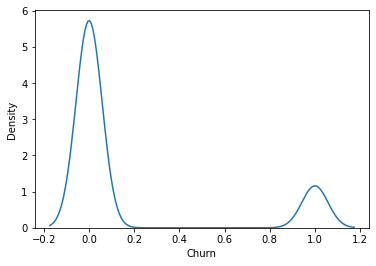

In [82]:
# checking if data is balanced
sns.kdeplot(data=data, x="Churn");

## EDA after data cleaning

In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   AccountID                11260 non-null  int64
 1   Churn                    11260 non-null  int64
 2   Tenure                   11260 non-null  Int64
 3   City_Tier                11260 non-null  Int64
 4   CC_Contacted_LY          11260 non-null  Int64
 5   Payment                  11260 non-null  Int64
 6   Gender                   11260 non-null  Int64
 7   Service_Score            11260 non-null  int64
 8   Account_user_count       11260 non-null  Int64
 9   account_segment          11260 non-null  Int64
 10  CC_Agent_Score           11260 non-null  Int64
 11  Marital_Status           11260 non-null  Int64
 12  rev_per_month            11260 non-null  Int64
 13  Complain_ly              11260 non-null  Int64
 14  rev_growth_yoy           11260 non-null  Int64
 15  co

In [84]:
data.shape

(11260, 19)

In [85]:
data.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
AccountID,11260.0,25629.500000,3250.626350,20000.0,22814.75,25629.5,28444.25,31259.0
Churn,11260.0,0.168384,0.374223,0.0,0.00,0.0,0.00,1.0
Tenure,11260.0,10.985879,12.757534,0.0,2.00,9.0,16.00,99.0
City_Tier,11260.0,1.647425,0.912763,1.0,1.00,1.0,3.00,3.0
CC_Contacted_LY,11260.0,17.850178,8.814851,4.0,11.00,16.0,23.00,132.0
Payment,11260.0,2.399112,1.379380,1.0,1.00,3.0,3.00,5.0
Gender,11260.0,1.604973,0.488878,1.0,1.00,2.0,2.00,2.0
Service_Score,11260.0,2.903375,0.722476,0.0,2.00,3.0,3.00,5.0
Account_user_count,11260.0,3.704973,1.004383,1.0,3.00,4.0,4.00,6.0
account_segment,11260.0,2.194494,1.267004,1.0,1.00,2.0,3.00,5.0


In [86]:
pd.DataFrame(data = [data.kurtosis(), data.skew()], index=['Kurtosis','Skewness']).T.round(2)

,Kurtosis,Skewness
AccountID,-1.20,0.00
Churn,1.14,1.77
Tenure,23.92,3.94
City_Tier,-1.37,0.75
CC_Contacted_LY,8.33,1.43
Payment,-1.02,0.45
Gender,-1.82,-0.43
Service_Score,-0.65,0.00
Account_user_count,0.73,-0.43
account_segment,-0.36,0.92


In [87]:
# Percentage of outlier in each column
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
pd.DataFrame((((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum()/data.shape[0]*100),columns = ['outlier %'], index = None). round(2)

,outlier %
AccountID,0.00
Churn,16.84
Tenure,1.23
City_Tier,0.00
CC_Contacted_LY,0.37
Payment,0.00
Gender,0.00
Service_Score,0.12
Account_user_count,6.76
account_segment,0.00


## Univariate Analysis

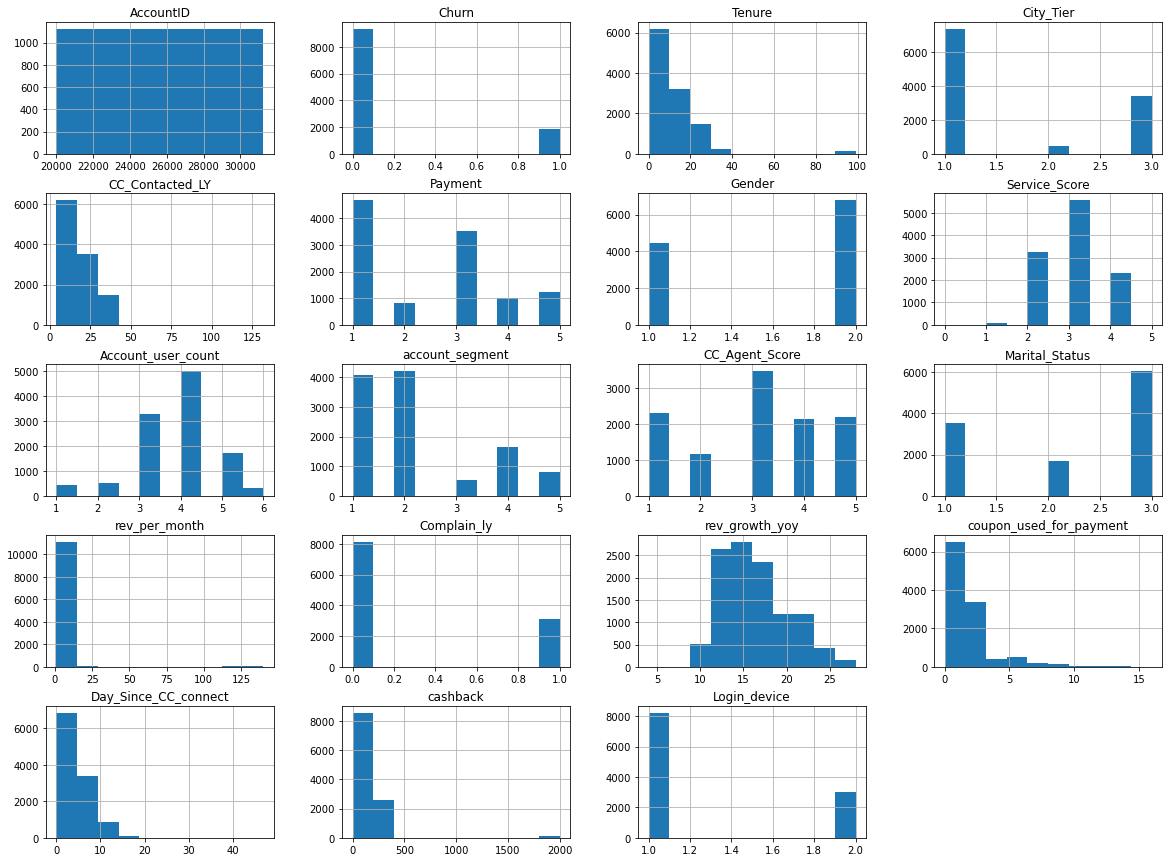

In [88]:
data.hist(figsize=(20,15));

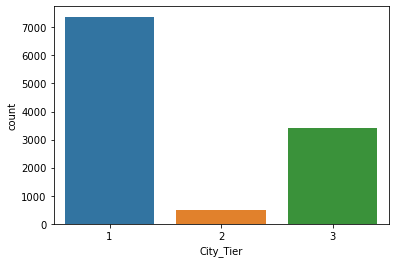

In [89]:
sns.countplot(x="City_Tier", data=data);

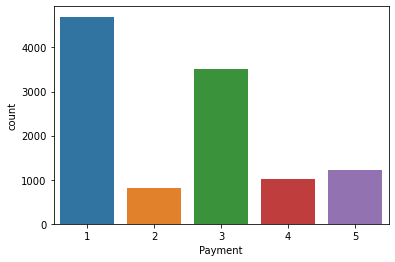

In [90]:
sns.countplot(x="Payment", data=data);

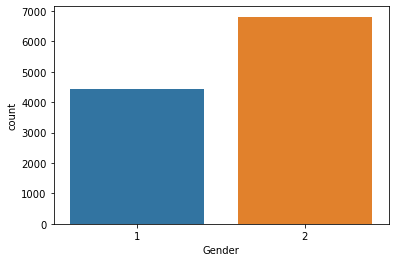

In [91]:
sns.countplot(x="Gender", data=data);

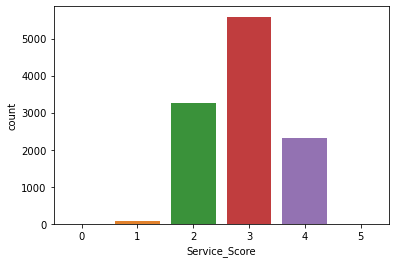

In [92]:
sns.countplot(x="Service_Score", data=data);

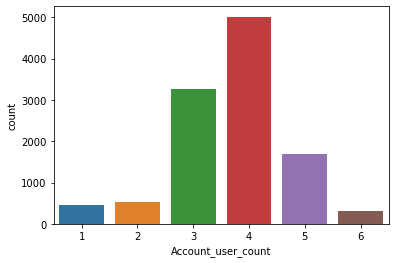

In [93]:
sns.countplot(x="Account_user_count", data=data);

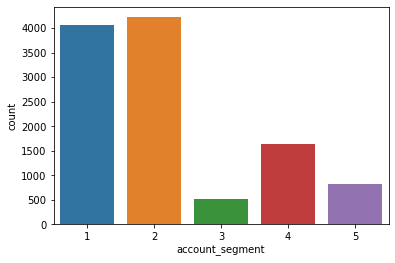

In [94]:
sns.countplot(x="account_segment", data=data);

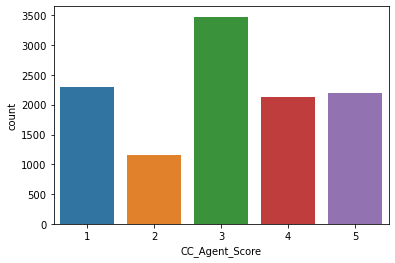

In [95]:
sns.countplot(x="CC_Agent_Score", data=data);

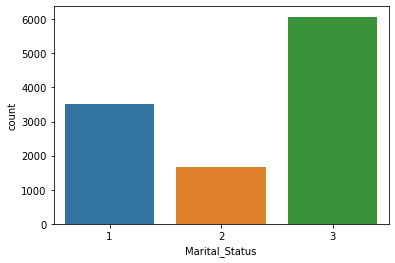

In [96]:
sns.countplot(x="Marital_Status", data=data);

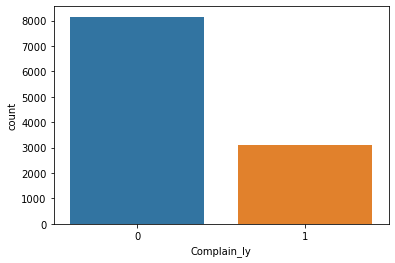

In [97]:
sns.countplot(x="Complain_ly", data=data);

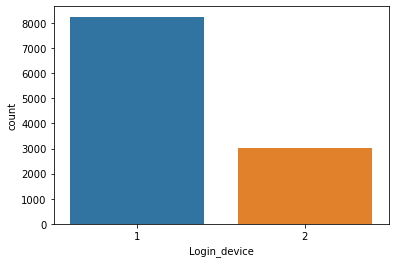

In [98]:
sns.countplot(x="Login_device", data=data);

## Bivariate & Multivariate Analysis

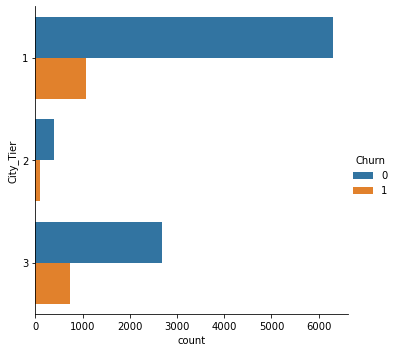

In [99]:
sns.catplot(y="City_Tier", hue="Churn", kind="count", data=data);

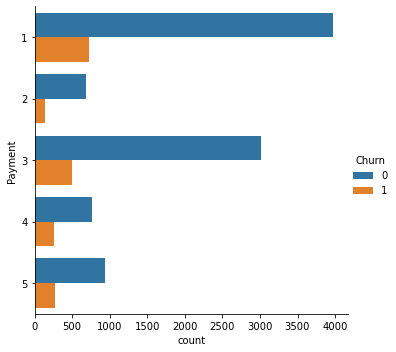

In [100]:
sns.catplot(y="Payment", hue="Churn", kind="count", data=data);

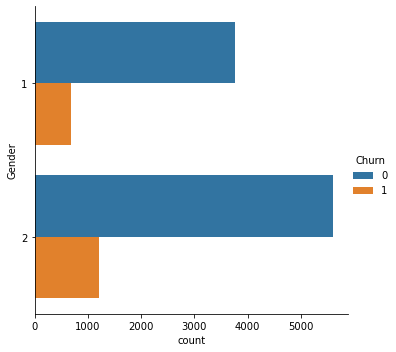

In [101]:
sns.catplot(y="Gender", hue="Churn", kind="count", data=data);

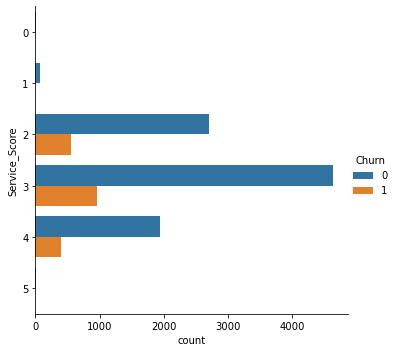

In [102]:
sns.catplot(y="Service_Score", hue="Churn", kind="count", data=data);

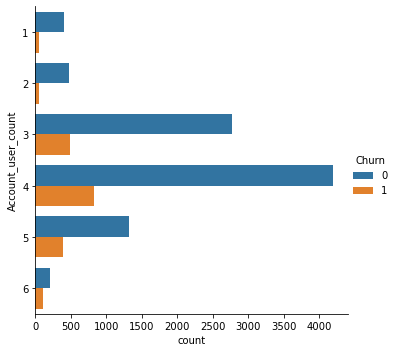

In [103]:
sns.catplot(y="Account_user_count", hue="Churn", kind="count", data=data);

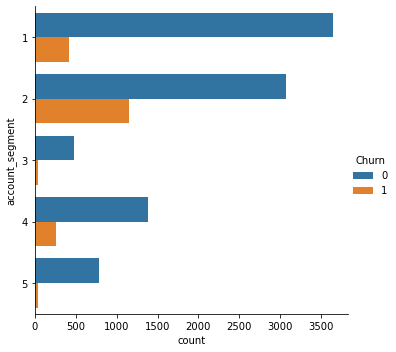

In [104]:
sns.catplot(y="account_segment", hue="Churn", kind="count", data=data);

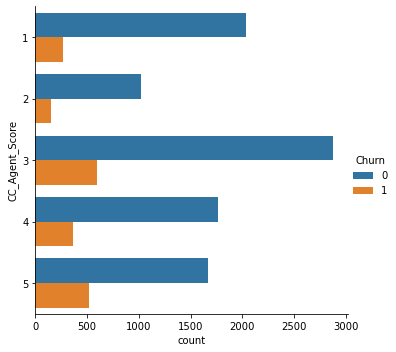

In [105]:
sns.catplot(y="CC_Agent_Score", hue="Churn", kind="count", data=data);

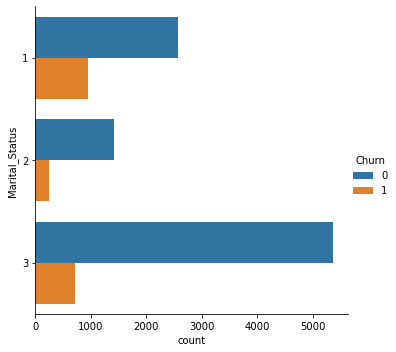

In [106]:
sns.catplot(y="Marital_Status", hue="Churn", kind="count", data=data);

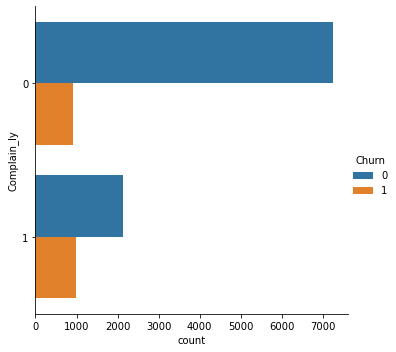

In [107]:
sns.catplot(y="Complain_ly", hue="Churn", kind="count", data=data);

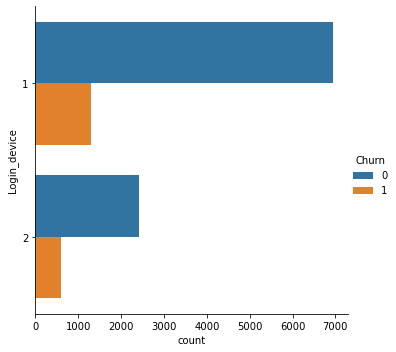

In [108]:
sns.catplot(y="Login_device", hue="Churn", kind="count", data=data);

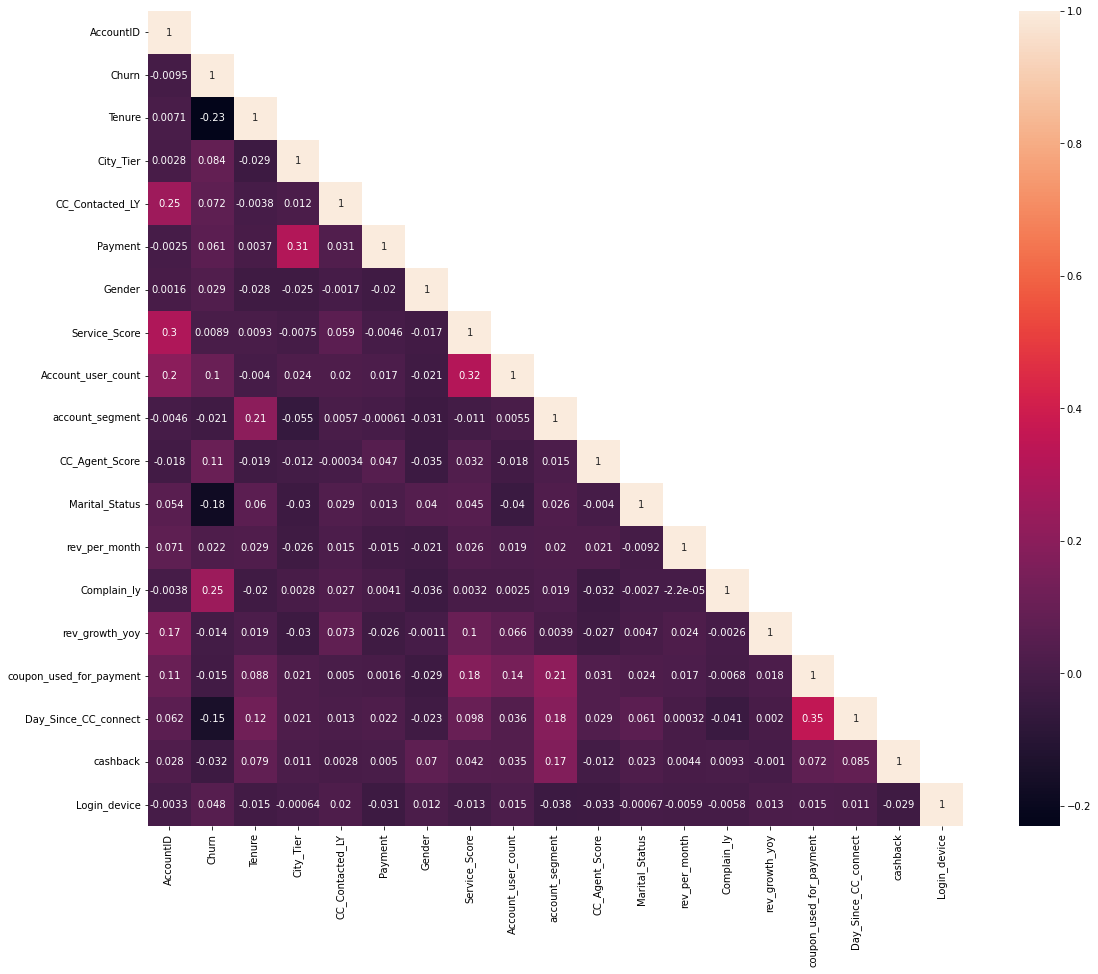

In [109]:
cor = data.corr()
mask = np.array(cor)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,15)
sns.heatmap(cor, mask=mask, vmax=1, square=True, annot=True)
plt.show()

## Outlier Treatment 

### Boxplots before treatment

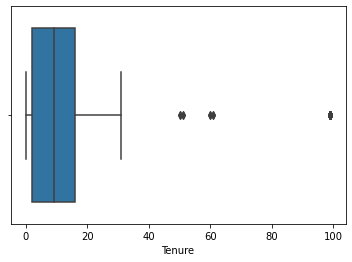

In [110]:
sns.boxplot(x="Tenure", data = data);

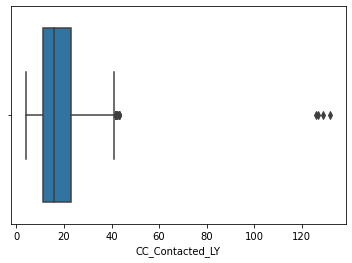

In [111]:
sns.boxplot(x="CC_Contacted_LY", data = data);

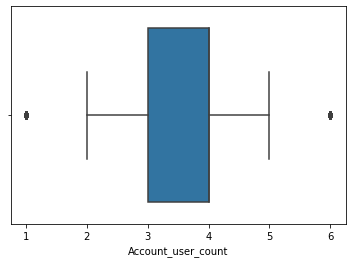

In [112]:
sns.boxplot(x="Account_user_count", data = data);

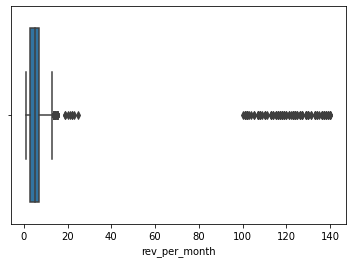

In [113]:
sns.boxplot(x="rev_per_month", data = data);

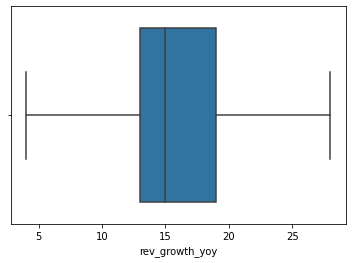

In [114]:
sns.boxplot(x="rev_growth_yoy", data = data);

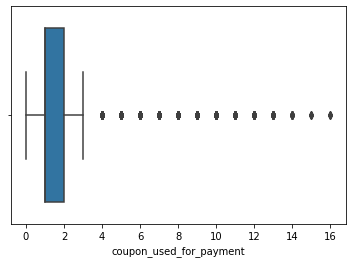

In [115]:
sns.boxplot(x="coupon_used_for_payment", data = data);

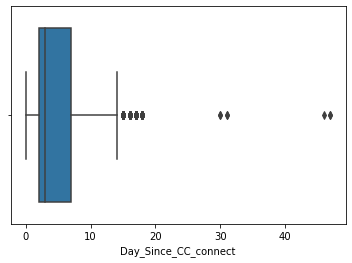

In [116]:
sns.boxplot(x="Day_Since_CC_connect", data = data);

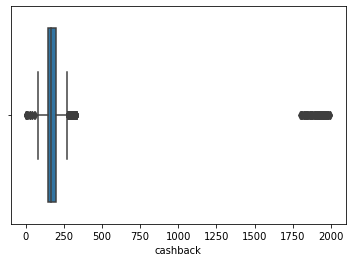

In [117]:
sns.boxplot(x="cashback", data = data);

In [118]:
#treating outlier
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range   

In [119]:
lw,up=remove_outlier(data['Tenure'])
data['Tenure']=np.where(data['Tenure']>up,up,data['Tenure'])
data['Tenure']=np.where(data['Tenure']<lw,lw,data['Tenure'])

lw,up=remove_outlier(data['CC_Contacted_LY'])
data['CC_Contacted_LY']=np.where(data['CC_Contacted_LY']>up,up,data['CC_Contacted_LY'])
data['CC_Contacted_LY']=np.where(data['CC_Contacted_LY']<lw,lw,data['CC_Contacted_LY'])

lw,up=remove_outlier(data['Account_user_count'])
data['Account_user_count']=np.where(data['Account_user_count']>up,up,data['Account_user_count'])
data['Account_user_count']=np.where(data['Account_user_count']<lw,lw,data['Account_user_count'])

lw,up=remove_outlier(data['cashback'])
data['cashback']=np.where(data['cashback']>up,up,data['cashback'])
data['cashback']=np.where(data['cashback']<lw,lw,data['cashback'])

lw,up=remove_outlier(data['rev_per_month'])
data['rev_per_month']=np.where(data['rev_per_month']>up,up,data['rev_per_month'])
data['rev_per_month']=np.where(data['rev_per_month']<lw,lw,data['rev_per_month'])

lw,up=remove_outlier(data['Day_Since_CC_connect'])
data['Day_Since_CC_connect']=np.where(data['Day_Since_CC_connect']>up,up,data['Day_Since_CC_connect'])
data['Day_Since_CC_connect']=np.where(data['Day_Since_CC_connect']<lw,lw,data['Day_Since_CC_connect'])

lw,up=remove_outlier(data['coupon_used_for_payment'])
data['coupon_used_for_payment']=np.where(data['coupon_used_for_payment']>up,up,data['coupon_used_for_payment'])
data['coupon_used_for_payment']=np.where(data['coupon_used_for_payment']<lw,lw,data['coupon_used_for_payment'])

lw,up=remove_outlier(data['rev_growth_yoy'])
data['rev_growth_yoy']=np.where(data['rev_growth_yoy']>up,up,data['rev_growth_yoy'])
data['rev_growth_yoy']=np.where(data['rev_growth_yoy']<lw,lw,data['rev_growth_yoy'])

### Boxplots after treatment

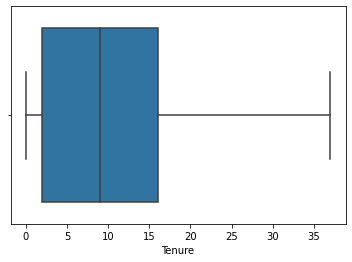

In [120]:
sns.boxplot(x="Tenure", data = data);

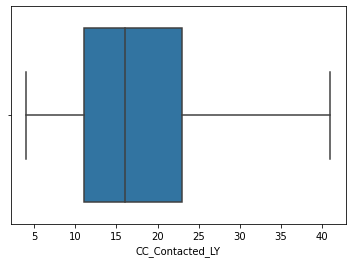

In [121]:
sns.boxplot(x="CC_Contacted_LY", data = data);

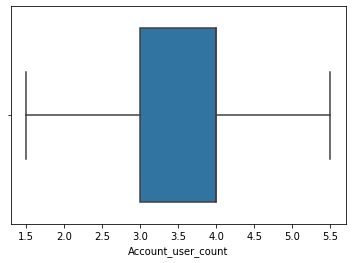

In [122]:
sns.boxplot(x="Account_user_count", data = data);

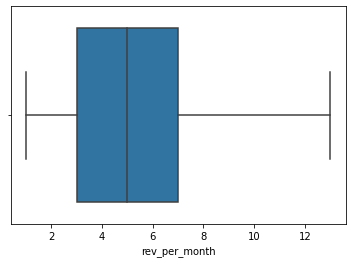

In [123]:
sns.boxplot(x="rev_per_month", data = data);

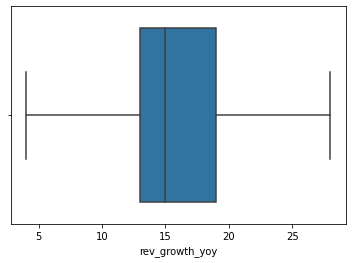

In [124]:
sns.boxplot(x="rev_growth_yoy", data = data);

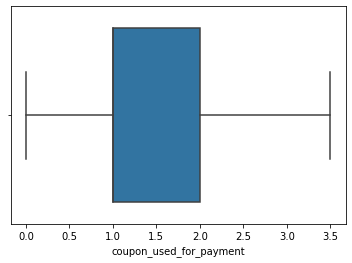

In [125]:
sns.boxplot(x="coupon_used_for_payment", data = data);

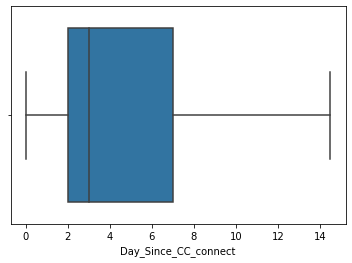

In [126]:
sns.boxplot(x="Day_Since_CC_connect", data = data);

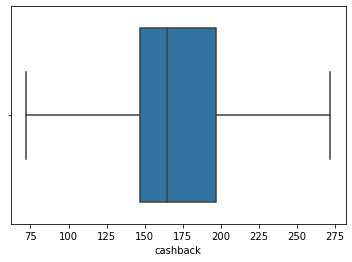

In [127]:
sns.boxplot(x="cashback", data = data);

### Scaling Data

In [128]:
from sklearn.preprocessing import MinMaxScaler

data['Scaled_Churn'] = MinMaxScaler().fit_transform(data[['Churn']])
data['Scaled_Tenure'] = MinMaxScaler().fit_transform(data[['Tenure']])
data['Scaled_City_Tier'] = MinMaxScaler().fit_transform(data[['City_Tier']])
data['Scaled_CC_Contacted_LY'] = MinMaxScaler().fit_transform(data[['CC_Contacted_LY']])
data['Scaled_Payment'] = MinMaxScaler().fit_transform(data[['Payment']])
data['Scaled_Gender'] = MinMaxScaler().fit_transform(data[['Gender']])
data['Scaled_Service_Score'] = MinMaxScaler().fit_transform(data[['Service_Score']])
data['Scaled_Account_user_count'] = MinMaxScaler().fit_transform(data[['Account_user_count']])
data['Scaled_account_segment'] = MinMaxScaler().fit_transform(data[['account_segment']])
data['Scaled_CC_Agent_Score'] = MinMaxScaler().fit_transform(data[['CC_Agent_Score']])
data['Scaled_Marital_Status'] = MinMaxScaler().fit_transform(data[['Marital_Status']])
data['Scaled_rev_per_month'] = MinMaxScaler().fit_transform(data[['rev_per_month']])
data['Scaled_Complain_ly'] = MinMaxScaler().fit_transform(data[['Complain_ly']])
data['Scaled_rev_growth_yoy'] = MinMaxScaler().fit_transform(data[['rev_growth_yoy']])
data['Scaled_coupon_used_for_payment'] = MinMaxScaler().fit_transform(data[['coupon_used_for_payment']])
data['Scaled_Day_Since_CC_connect'] = MinMaxScaler().fit_transform(data[['Day_Since_CC_connect']])
data['Scaled_cashback'] = MinMaxScaler().fit_transform(data[['cashback']])
data['Scaled_Login_device'] = MinMaxScaler().fit_transform(data[['Login_device']])

In [129]:
data_scaled = pd.DataFrame({
'Churn': data['Scaled_Churn'] ,    
'Tenure': data['Scaled_Tenure'] ,    
'City_Tier': data['Scaled_City_Tier'] ,    
'CC_Contacted_LY': data['Scaled_CC_Contacted_LY'] ,    
'Payment': data['Scaled_Payment'] ,    
'Gender': data['Scaled_Gender'] ,    
'Service_Score': data['Scaled_Service_Score'] ,    
'Account_user_count': data['Scaled_Account_user_count'] ,    
'account_segment': data['Scaled_account_segment'] ,    
'CC_Agent_Score': data['Scaled_CC_Agent_Score'] ,    
'Marital_Status': data['Scaled_Marital_Status'] ,    
'rev_per_month': data['Scaled_rev_per_month'] ,    
'Complain_ly': data['Scaled_Complain_ly'] ,    
'rev_growth_yoy': data['Scaled_rev_growth_yoy'] ,    
'coupon_used_for_payment': data['Scaled_coupon_used_for_payment'] ,    
'Day_Since_CC_connect': data['Scaled_Day_Since_CC_connect'] ,
'cashback': data['Scaled_cashback'] ,    
'Login_device': data['Scaled_Login_device'] })
data_scaled

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,1.0,0.108108,1.0,0.054054,0.00,0.0,0.6,0.375,0.00,0.25,0.0,0.666667,1.0,0.291667,0.285714,0.344828,0.435,0.0
1,1.0,0.000000,0.0,0.108108,0.25,1.0,0.6,0.625,0.25,0.50,0.0,0.500000,1.0,0.458333,0.000000,0.000000,0.240,0.0
2,1.0,0.000000,0.0,0.702703,0.00,1.0,0.4,0.625,0.25,0.50,0.0,0.416667,1.0,0.416667,0.000000,0.206897,0.465,0.0
3,1.0,0.000000,1.0,0.297297,0.00,1.0,0.4,0.625,0.00,1.00,0.0,0.583333,0.0,0.791667,0.000000,0.206897,0.310,0.0
4,1.0,0.000000,0.0,0.216216,0.50,1.0,0.4,0.375,0.25,1.00,0.0,0.166667,0.0,0.291667,0.285714,0.206897,0.285,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11255,0.0,0.270270,0.0,0.810811,0.50,1.0,0.6,0.125,0.00,0.00,1.0,0.666667,0.0,0.625000,0.285714,0.275862,0.405,1.0
11256,0.0,0.351351,0.0,0.405405,0.50,1.0,0.6,0.875,0.75,1.00,1.0,0.500000,0.0,0.500000,0.285714,0.551724,0.770,0.0
11257,0.0,0.027027,0.0,0.270270,0.00,1.0,0.6,0.125,0.00,0.75,1.0,0.500000,1.0,0.750000,0.285714,0.275862,0.595,0.0
11258,0.0,0.621622,1.0,0.189189,0.50,1.0,0.8,0.875,0.00,0.75,1.0,0.500000,0.0,0.500000,0.571429,0.620690,0.535,1.0


In [130]:
print(data_scaled.std())

Churn                      0.374223
Tenure                     0.240241
City_Tier                  0.456381
CC_Contacted_LY            0.231463
Payment                    0.344845
Gender                     0.488878
Service_Score              0.144495
Account_user_count         0.231069
account_segment            0.316751
CC_Agent_Score             0.343166
Marital_Status             0.447373
rev_per_month              0.239968
Complain_ly                0.447181
rev_growth_yoy             0.156553
coupon_used_for_payment    0.314928
Day_Since_CC_connect       0.240931
cashback                   0.218847
Login_device               0.442952
dtype: float64


In [131]:
data_scaled['Payment'] = data_scaled['Payment'].astype('int64')
data_scaled['Gender'] = data_scaled['Gender'].astype('int64')
data_scaled['Service_Score'] = data_scaled['Service_Score'].astype('int64')
data_scaled['Account_user_count'] = data_scaled['Account_user_count'].astype('int64')
data_scaled['account_segment'] = data_scaled['account_segment'].astype('int64')
data_scaled['CC_Agent_Score'] = data_scaled['CC_Agent_Score'].astype('int64')
data_scaled['rev_per_month'] = data_scaled['rev_per_month'].astype('int64')
data_scaled['coupon_used_for_payment'] = data_scaled['coupon_used_for_payment'].astype('int64')
data_scaled['Day_Since_CC_connect'] = data_scaled['Day_Since_CC_connect'].astype('int64')
data_scaled['cashback'] = data_scaled['cashback'].astype('int64')
data_scaled['Marital_Status'] = data_scaled['Marital_Status'].astype('int64')
data_scaled['Complain_ly'] = data_scaled['Complain_ly'].astype('int64')
data_scaled['rev_growth_yoy'] = data_scaled['rev_growth_yoy'].astype('int64')
data_scaled['Login_device'] = data_scaled['Login_device'].astype('int64')
data_scaled['Tenure'] = data_scaled['Tenure'].astype('int64')
data_scaled['City_Tier'] = data_scaled['City_Tier'].astype('int64')
data_scaled['CC_Contacted_LY'] = data_scaled['CC_Contacted_LY'].astype('int64')
data_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  float64
 1   Tenure                   11260 non-null  int64  
 2   City_Tier                11260 non-null  int64  
 3   CC_Contacted_LY          11260 non-null  int64  
 4   Payment                  11260 non-null  int64  
 5   Gender                   11260 non-null  int64  
 6   Service_Score            11260 non-null  int64  
 7   Account_user_count       11260 non-null  int64  
 8   account_segment          11260 non-null  int64  
 9   CC_Agent_Score           11260 non-null  int64  
 10  Marital_Status           11260 non-null  int64  
 11  rev_per_month            11260 non-null  int64  
 12  Complain_ly              11260 non-null  int64  
 13  rev_growth_yoy           11260 non-null  int64  
 14  coupon_used_for_paymen

### Train and Test Data Split

In [132]:
X = data_scaled.drop('Churn' , axis=1)
y = data_scaled.pop("Churn")

In [133]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [134]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (7882, 17)
X_test (3378, 17)
y_train (7882,)
y_test (3378,)


In [135]:
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.975], flip_y=0, random_state=1)
counter=Counter(y)
counter

Counter({0: 975, 1: 25})

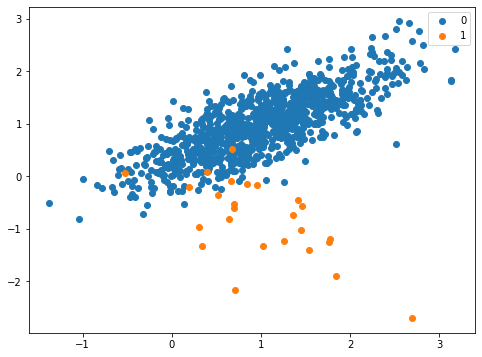

In [136]:
plt.figure(figsize=(8,6))
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plt.show()

### Performing SMOTE to balance data

In [137]:
# applying smote to train dataset and resampling
sm = SMOTE(random_state=1)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

In [138]:
print('X_train_res',X_train_res.shape)
print('y_train_res',y_train_res.shape)

X_train_res (13112, 17)
y_train_res (13112,)


In [139]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [140]:
counter=Counter(y)
counter

Counter({0: 975, 1: 975})

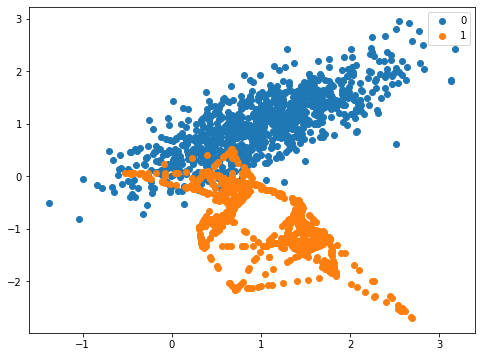

In [141]:
plt.figure(figsize=(8,6))
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plt.show()

In [142]:
wss =[] 
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(data_scaled)
    wss.append(KM.inertia_)
wss

[18663.908259324995,
 15856.441018241252,
 14034.245161400237,
 13065.657172627081,
 12615.041385966779,
 11538.835399127542,
 10994.506162814789,
 10442.251528651694,
 9990.049334180565,
 9733.4711739208]

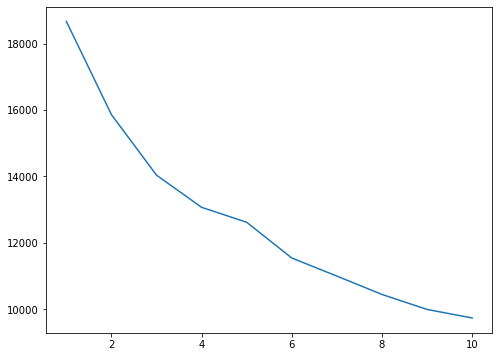

In [143]:
plt.figure(figsize=(8,6))
plt.plot(range(1,11), wss);
plt.show()

In [144]:
k_means = KMeans(n_clusters = 3)
k_means.fit(data_scaled)
labels = k_means.labels_

In [145]:
data_scaled["Clus_kmeans"] = labels
data_scaled.head(5)

,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device,Clus_kmeans
0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,2
2,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,2
3,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,2


In [146]:
data_scaled.groupby(["Clus_kmeans"]).count()

,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
Clus_kmeans,,,,,,,,,,,,,,,,,
0,3405,3405,3405,3405,3405,3405,3405,3405,3405,3405,3405,3405,3405,3405,3405,3405,3405
1,4346,4346,4346,4346,4346,4346,4346,4346,4346,4346,4346,4346,4346,4346,4346,4346,4346
2,3509,3509,3509,3509,3509,3509,3509,3509,3509,3509,3509,3509,3509,3509,3509,3509,3509


### Project Note 2

In [147]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7882 entries, 7580 to 235
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Tenure                   7882 non-null   int64
 1   City_Tier                7882 non-null   int64
 2   CC_Contacted_LY          7882 non-null   int64
 3   Payment                  7882 non-null   int64
 4   Gender                   7882 non-null   int64
 5   Service_Score            7882 non-null   int64
 6   Account_user_count       7882 non-null   int64
 7   account_segment          7882 non-null   int64
 8   CC_Agent_Score           7882 non-null   int64
 9   Marital_Status           7882 non-null   int64
 10  rev_per_month            7882 non-null   int64
 11  Complain_ly              7882 non-null   int64
 12  rev_growth_yoy           7882 non-null   int64
 13  coupon_used_for_payment  7882 non-null   int64
 14  Day_Since_CC_connect     7882 non-null   int64
 15  ca

In [148]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3378 entries, 784 to 9559
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Tenure                   3378 non-null   int64
 1   City_Tier                3378 non-null   int64
 2   CC_Contacted_LY          3378 non-null   int64
 3   Payment                  3378 non-null   int64
 4   Gender                   3378 non-null   int64
 5   Service_Score            3378 non-null   int64
 6   Account_user_count       3378 non-null   int64
 7   account_segment          3378 non-null   int64
 8   CC_Agent_Score           3378 non-null   int64
 9   Marital_Status           3378 non-null   int64
 10  rev_per_month            3378 non-null   int64
 11  Complain_ly              3378 non-null   int64
 12  rev_growth_yoy           3378 non-null   int64
 13  coupon_used_for_payment  3378 non-null   int64
 14  Day_Since_CC_connect     3378 non-null   int64
 15  ca

In [149]:
X_train_res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13112 entries, 0 to 13111
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Tenure                   13112 non-null  int64
 1   City_Tier                13112 non-null  int64
 2   CC_Contacted_LY          13112 non-null  int64
 3   Payment                  13112 non-null  int64
 4   Gender                   13112 non-null  int64
 5   Service_Score            13112 non-null  int64
 6   Account_user_count       13112 non-null  int64
 7   account_segment          13112 non-null  int64
 8   CC_Agent_Score           13112 non-null  int64
 9   Marital_Status           13112 non-null  int64
 10  rev_per_month            13112 non-null  int64
 11  Complain_ly              13112 non-null  int64
 12  rev_growth_yoy           13112 non-null  int64
 13  coupon_used_for_payment  13112 non-null  int64
 14  Day_Since_CC_connect     13112 non-null  int64
 15  ca

In [150]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE 
from collections import Counter
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

### Logistic Regression Model

In [151]:
lg = LogisticRegression(solver='lbfgs', max_iter=10000, random_state=1)
lg.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=1)

In [152]:
ytrain_predict_lg = lg.predict(X_train)
ytest_predict_lg = lg.predict(X_test)

In [153]:
lg.score(X_train, y_train)

0.8391271250951535

In [154]:
lg.score(X_test, y_test)

0.8398460627590291

In [155]:
confusion_matrix(y_train, ytrain_predict_lg)

array([[6466,   90],
       [1178,  148]], dtype=int64)

In [156]:
confusion_matrix(y_test, ytest_predict_lg)

array([[2764,   44],
       [ 497,   73]], dtype=int64)

In [157]:
print(classification_report(y_train, ytrain_predict_lg))

              precision    recall  f1-score   support

         0.0       0.85      0.99      0.91      6556
         1.0       0.62      0.11      0.19      1326

    accuracy                           0.84      7882
   macro avg       0.73      0.55      0.55      7882
weighted avg       0.81      0.84      0.79      7882



In [158]:
print(classification_report(y_test, ytest_predict_lg))

              precision    recall  f1-score   support

         0.0       0.85      0.98      0.91      2808
         1.0       0.62      0.13      0.21       570

    accuracy                           0.84      3378
   macro avg       0.74      0.56      0.56      3378
weighted avg       0.81      0.84      0.79      3378



AUC score and ROC curve for training dataset
AUC: 0.750


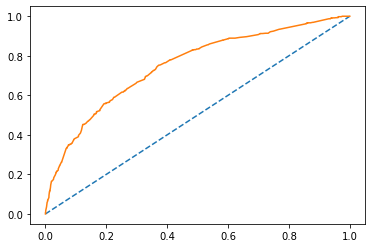

In [159]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = lg.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for training dataset")
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC score and ROC curve for testing dataset
AUC: 0.750


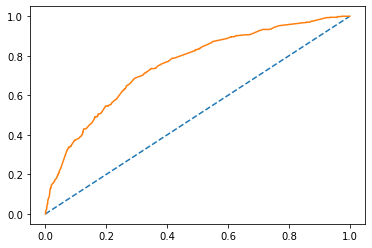

In [160]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
probs = lg.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for testing dataset")
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [161]:
scores_lg_train = cross_val_score(lg, X_train, y_train, cv=10)
scores_lg_train

array([0.8365019 , 0.84030418, 0.84517766, 0.84010152, 0.83883249,
       0.84390863, 0.83629442, 0.8286802 , 0.83502538, 0.84010152])

In [162]:
scores_lg_test = cross_val_score(lg, X_test, y_test, cv=10)
scores_lg_test

array([0.82544379, 0.83727811, 0.83727811, 0.84615385, 0.84319527,
       0.82840237, 0.83727811, 0.83727811, 0.83679525, 0.83679525])

In [163]:
param_grid = {
    'solver': ['lbfgs','newton-cg', 'liblinear', 'sag', 'saga'],
    'penalty': ['l1','l2','none'],
    'tol':[0.0001,0.00001]
}

grid_search = GridSearchCV(estimator = lg, param_grid = param_grid, cv = 10, n_jobs=-1,scoring='f1')

In [164]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=LogisticRegression(max_iter=10000, random_state=1),
             n_jobs=-1,
             param_grid={'penalty': ['l1', 'l2', 'none'],
                         'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                    'saga'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [165]:
grid_search.best_params_

{'penalty': 'none', 'solver': 'lbfgs', 'tol': 0.0001}

In [166]:
best_grid = grid_search.best_estimator_
ytrain_predict_lgcv = best_grid.predict(X_train)
ytest_predict_lgcv = best_grid.predict(X_test)

In [167]:
best_grid.score(X_train, y_train)

0.8392539964476021

In [168]:
best_grid.score(X_test, y_test)

0.8398460627590291

In [169]:
confusion_matrix(y_train, ytrain_predict_lgcv)

array([[6461,   95],
       [1172,  154]], dtype=int64)

In [170]:
confusion_matrix(y_test, ytest_predict_lgcv)

array([[2764,   44],
       [ 497,   73]], dtype=int64)

In [171]:
print(classification_report(y_train, ytrain_predict_lgcv))

              precision    recall  f1-score   support

         0.0       0.85      0.99      0.91      6556
         1.0       0.62      0.12      0.20      1326

    accuracy                           0.84      7882
   macro avg       0.73      0.55      0.55      7882
weighted avg       0.81      0.84      0.79      7882



In [172]:
print(classification_report(y_test, ytest_predict_lgcv))

              precision    recall  f1-score   support

         0.0       0.85      0.98      0.91      2808
         1.0       0.62      0.13      0.21       570

    accuracy                           0.84      3378
   macro avg       0.74      0.56      0.56      3378
weighted avg       0.81      0.84      0.79      3378



AUC score and ROC curve for training dataset
AUC: 0.750


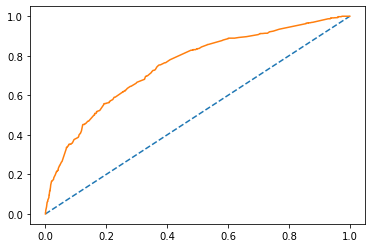

In [173]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for training dataset")
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC score and ROC curve for testing dataset
AUC: 0.752


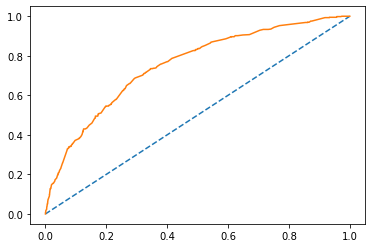

In [174]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for testing dataset")
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [175]:
scores_lgcv_train = cross_val_score(best_grid, X_train, y_train, cv=10)
scores_lgcv_train

array([0.8365019 , 0.84030418, 0.84517766, 0.84137056, 0.83883249,
       0.84390863, 0.83629442, 0.8286802 , 0.83375635, 0.84137056])

In [176]:
scores_lgcv_test = cross_val_score(best_grid, X_test, y_test, cv=10)
scores_lgcv_test

array([0.82248521, 0.83727811, 0.83431953, 0.84319527, 0.84615385,
       0.82840237, 0.84023669, 0.83727811, 0.83679525, 0.83976261])

### Logistic regression model using SMOTE

In [177]:
lg.fit(X_train_res, y_train_res)

LogisticRegression(max_iter=10000, random_state=1)

In [178]:
ytrain_predict_lgsm = lg.predict(X_train_res) 
ytest_predict_lgsm = lg.predict(X_test)

In [179]:
lg.score(X_train_res, y_train_res)

0.6821995118974985

In [180]:
lg.score(X_test, y_test)

0.6767317939609236

In [181]:
confusion_matrix(y_train_res, ytrain_predict_lgsm)

array([[4369, 2187],
       [1980, 4576]], dtype=int64)

In [182]:
confusion_matrix(y_test, ytest_predict_lgsm)

array([[1880,  928],
       [ 164,  406]], dtype=int64)

In [183]:
print(classification_report(y_train_res, ytrain_predict_lgsm))

              precision    recall  f1-score   support

         0.0       0.69      0.67      0.68      6556
         1.0       0.68      0.70      0.69      6556

    accuracy                           0.68     13112
   macro avg       0.68      0.68      0.68     13112
weighted avg       0.68      0.68      0.68     13112



In [184]:
print(classification_report(y_test, ytest_predict_lgsm))

              precision    recall  f1-score   support

         0.0       0.92      0.67      0.77      2808
         1.0       0.30      0.71      0.43       570

    accuracy                           0.68      3378
   macro avg       0.61      0.69      0.60      3378
weighted avg       0.82      0.68      0.72      3378



AUC score and ROC curve for training dataset
AUC: 0.751


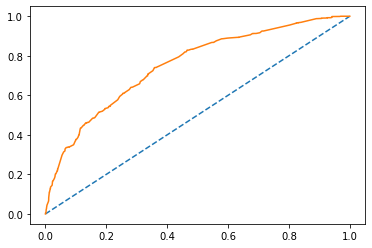

In [185]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = lg.predict_proba(X_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for training dataset")
auc = roc_auc_score(y_train_res, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC score and ROC curve for testing dataset
AUC: 0.748


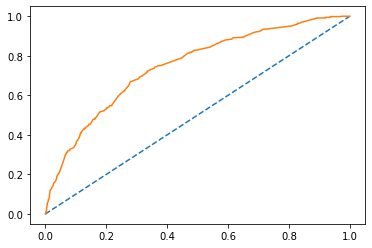

In [186]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = lg.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for testing dataset")
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [187]:
scores_lgsm_train = cross_val_score(lg, X_train_res, y_train_res, cv=10)
scores_lgsm_train

array([0.67606707, 0.66920732, 0.68115942, 0.68115942, 0.668955  ,
       0.70633105, 0.6590389 , 0.68421053, 0.68954996, 0.70022883])

In [188]:
scores_lgsm_test = cross_val_score(lg, X_test, y_test, cv=10)
scores_lgsm_test

array([0.82544379, 0.83727811, 0.83727811, 0.84615385, 0.84319527,
       0.82840237, 0.83727811, 0.83727811, 0.83679525, 0.83679525])

### Linear Discriminant Analysis Model

In [189]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train,y_train)
lda

LinearDiscriminantAnalysis()

In [190]:
ytrain_predict_lda = lda.predict(X_train)
ytest_predict_lda = lda.predict(X_test)

In [191]:
lda.score(X_train, y_train)

0.8421720375539203

In [192]:
lda.score(X_test, y_test)

0.8362936648904677

In [193]:
confusion_matrix(y_train, ytrain_predict_lda)

array([[6413,  143],
       [1101,  225]], dtype=int64)

In [194]:
confusion_matrix(y_test, ytest_predict_lda)

array([[2738,   70],
       [ 483,   87]], dtype=int64)

In [195]:
metrics.classification_report(y_train,ytrain_predict_lda)

'              precision    recall  f1-score   support\n\n         0.0       0.85      0.98      0.91      6556\n         1.0       0.61      0.17      0.27      1326\n\n    accuracy                           0.84      7882\n   macro avg       0.73      0.57      0.59      7882\nweighted avg       0.81      0.84      0.80      7882\n'

In [196]:
metrics.classification_report(y_test,ytest_predict_lda)

'              precision    recall  f1-score   support\n\n         0.0       0.85      0.98      0.91      2808\n         1.0       0.55      0.15      0.24       570\n\n    accuracy                           0.84      3378\n   macro avg       0.70      0.56      0.57      3378\nweighted avg       0.80      0.84      0.80      3378\n'

AUC score and ROC curve for training dataset
AUC: 0.748


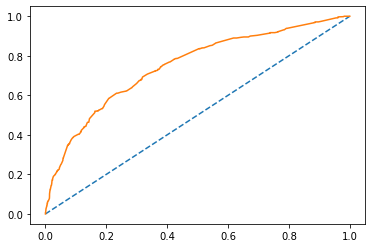

In [197]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
probs1 = lda.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs1 = probs1[:, 1]
# calculate AUC
print("AUC score and ROC curve for training dataset")
train_auc1 = roc_auc_score(y_train, probs1)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr1, train_tpr1, train_thresholds1 = roc_curve(y_train, probs1)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr1, train_tpr1);

AUC score and ROC curve for testing dataset
AUC: 0.748


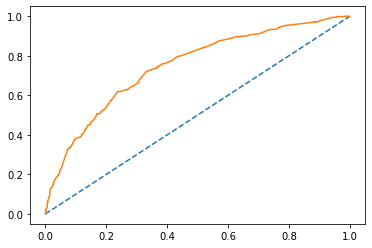

In [198]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
probs2 = lda.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs2 = probs2[:, 1]
# calculate AUC
print("AUC score and ROC curve for testing dataset")
test_auc = roc_auc_score(y_test, probs2)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr2, test_tpr2, test_thresholds2 = roc_curve(y_test, probs2)
plt.plot([0, 1], [0, 1], linestyle='--')
#plot the roc curve for the model
plt.plot(test_fpr2, test_tpr2);

In [199]:
scores_lda_train = cross_val_score(lda, X_train, y_train, cv=10)
scores_lda_train

array([0.83776933, 0.84157161, 0.84771574, 0.83375635, 0.83883249,
       0.84771574, 0.83629442, 0.82994924, 0.83629442, 0.85152284])

In [200]:
scores_lda_test = cross_val_score(lda, X_test, y_test, cv=10)
scores_lda_test

array([0.82840237, 0.83431953, 0.82840237, 0.84023669, 0.84615385,
       0.83136095, 0.84023669, 0.83431953, 0.83679525, 0.83086053])

### LDA model using GridSearchCV

In [201]:
param_grid = {
    'solver': ['svd', 'lsqr', 'eigen'],
    'tol' : [0.0001,0.0002,0.0003],
    'shrinkage' : ['auto', 'float', 'None'],
    
}

grid_search = GridSearchCV(estimator = lda, param_grid = param_grid, cv = 10, n_jobs=-1,scoring='f1')

In [202]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LinearDiscriminantAnalysis(), n_jobs=-1,
             param_grid={'shrinkage': ['auto', 'float', 'None'],
                         'solver': ['svd', 'lsqr', 'eigen'],
                         'tol': [0.0001, 0.0002, 0.0003]},
             scoring='f1')

In [203]:
grid_search.best_params_

{'shrinkage': 'auto', 'solver': 'lsqr', 'tol': 0.0001}

In [204]:
best_grid = grid_search.best_estimator_
ytrain_predict_ldacv = best_grid.predict(X_train)
ytest_predict_ldacv = best_grid.predict(X_test)

In [205]:
best_grid.score(X_train, y_train)

0.8416645521441258

In [206]:
best_grid.score(X_test, y_test)

0.8354055654233274

In [207]:
confusion_matrix(y_train, ytrain_predict_ldacv)

array([[6394,  162],
       [1086,  240]], dtype=int64)

In [208]:
confusion_matrix(y_test, ytest_predict_ldacv)

array([[2728,   80],
       [ 476,   94]], dtype=int64)

In [209]:
print(classification_report(y_train, ytrain_predict_ldacv))

              precision    recall  f1-score   support

         0.0       0.85      0.98      0.91      6556
         1.0       0.60      0.18      0.28      1326

    accuracy                           0.84      7882
   macro avg       0.73      0.58      0.59      7882
weighted avg       0.81      0.84      0.80      7882



In [210]:
print(classification_report(y_test, ytest_predict_ldacv))

              precision    recall  f1-score   support

         0.0       0.85      0.97      0.91      2808
         1.0       0.54      0.16      0.25       570

    accuracy                           0.84      3378
   macro avg       0.70      0.57      0.58      3378
weighted avg       0.80      0.84      0.80      3378



AUC score and ROC curve for training dataset
AUC: 0.748


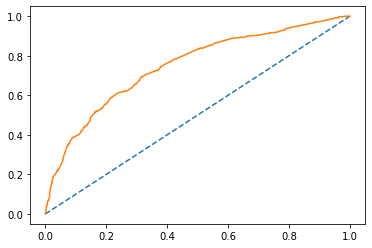

In [211]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for training dataset")
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC score and ROC curve for testing dataset
AUC: 0.747


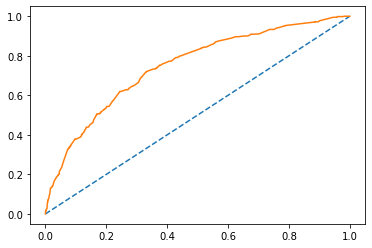

In [212]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for testing dataset")
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [213]:
scores_ldacv_train = cross_val_score(best_grid, X_train, y_train, cv=10)
scores_ldacv_train

array([0.83776933, 0.84157161, 0.84898477, 0.84010152, 0.83756345,
       0.85659898, 0.83883249, 0.8286802 , 0.83375635, 0.85152284])

In [214]:
scores_ldacv_test = cross_val_score(lda, X_test, y_test, cv=10)
scores_ldacv_test

array([0.82840237, 0.83431953, 0.82840237, 0.84023669, 0.84615385,
       0.83136095, 0.84023669, 0.83431953, 0.83679525, 0.83086053])

### LDA model using SMOTE

In [215]:
lda.fit(X_train_res, y_train_res)

LinearDiscriminantAnalysis()

In [216]:
ytrain_predict_ldasm = lda.predict(X_train_res)
ytest_predict_ldasm = lda.predict(X_test)

In [217]:
lda.score(X_train_res, y_train_res)

0.6866229408175717

In [218]:
lda.score(X_test, y_test)

0.6785079928952042

In [219]:
confusion_matrix(y_train_res, ytrain_predict_ldasm)

array([[4397, 2159],
       [1950, 4606]], dtype=int64)

In [220]:
confusion_matrix(y_test, ytest_predict_ldasm)

array([[1884,  924],
       [ 162,  408]], dtype=int64)

In [221]:
print(classification_report(y_train_res, ytrain_predict_ldasm))

              precision    recall  f1-score   support

         0.0       0.69      0.67      0.68      6556
         1.0       0.68      0.70      0.69      6556

    accuracy                           0.69     13112
   macro avg       0.69      0.69      0.69     13112
weighted avg       0.69      0.69      0.69     13112



In [222]:
print(classification_report(y_test, ytest_predict_ldasm))

              precision    recall  f1-score   support

         0.0       0.92      0.67      0.78      2808
         1.0       0.31      0.72      0.43       570

    accuracy                           0.68      3378
   macro avg       0.61      0.69      0.60      3378
weighted avg       0.82      0.68      0.72      3378



AUC score and ROC curve for training dataset
AUC: 0.752


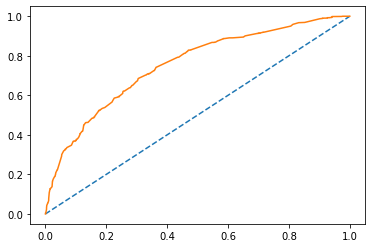

In [223]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = lda.predict_proba(X_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for training dataset")
auc = roc_auc_score(y_train_res, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC score and ROC curve for testing dataset
AUC: 0.748


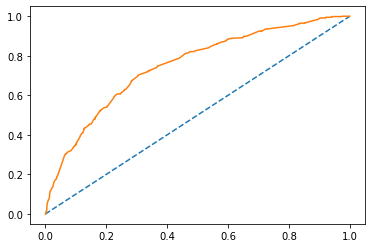

In [224]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = lda.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for testing dataset")
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [225]:
scores_ldasm_train = cross_val_score(lda, X_train_res, y_train_res, cv=10)
scores_ldasm_train

array([0.67682927, 0.67606707, 0.68421053, 0.68268497, 0.67276888,
       0.70861937, 0.66361556, 0.67963387, 0.68649886, 0.70480549])

In [226]:
scores_ldasm_test = cross_val_score(lda, X_test, y_test, cv=10)
scores_ldasm_test

array([0.82840237, 0.83431953, 0.82840237, 0.84023669, 0.84615385,
       0.83136095, 0.84023669, 0.83431953, 0.83679525, 0.83086053])

### KNN Model

In [227]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [228]:
ytrain_predict_knn = knn.predict(X_train)
ytest_predict_knn = knn.predict(X_test)

In [229]:
knn.score(X_train, y_train)

0.8572697284953058

In [230]:
knn.score(X_test, y_test)

0.8404381290704559

In [231]:
print(metrics.confusion_matrix(y_train, ytrain_predict_knn))

[[6312  244]
 [ 881  445]]


In [232]:
print(metrics.confusion_matrix(y_test, ytest_predict_knn))

[[2679  129]
 [ 410  160]]


In [233]:
print (classification_report(y_train, ytrain_predict_knn))

              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92      6556
         1.0       0.65      0.34      0.44      1326

    accuracy                           0.86      7882
   macro avg       0.76      0.65      0.68      7882
weighted avg       0.84      0.86      0.84      7882



In [234]:
print(metrics.classification_report(y_test, ytest_predict_knn))

              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91      2808
         1.0       0.55      0.28      0.37       570

    accuracy                           0.84      3378
   macro avg       0.71      0.62      0.64      3378
weighted avg       0.81      0.84      0.82      3378



AUC score and ROC curve for training dataset
AUC: 0.749


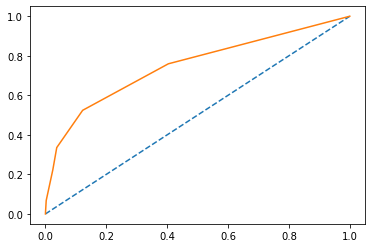

In [235]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = knn.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for training dataset")
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC score and ROC curve for testing dataset
AUC: 0.715


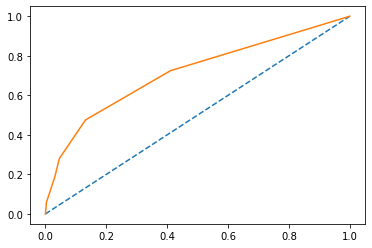

In [236]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = knn.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for testing dataset")
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [237]:
scores_knn_train = cross_val_score(knn, X_train, y_train, cv=10)
scores_knn_train

array([0.83523447, 0.82129278, 0.84898477, 0.84771574, 0.84390863,
       0.8464467 , 0.84010152, 0.79568528, 0.84137056, 0.83883249])

In [238]:
scores_knn_test = cross_val_score(knn, X_test, y_test, cv=10)
scores_knn_test

array([0.83136095, 0.83136095, 0.83727811, 0.84023669, 0.82248521,
       0.82544379, 0.82544379, 0.82544379, 0.81305638, 0.80118694])

### Finding the right value for n_neighbor

In [239]:
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # evaluate test accuracy
    scores = knn.score(X_test, y_test)
    ac_scores.append(scores)

MCE = [1 - x for x in ac_scores]
MCE

[0.24304322084073415,
 0.17021906453522795,
 0.1595618709295441,
 0.16489046773238603,
 0.16015393724097093,
 0.16193013617525165,
 0.16341030195381878,
 0.16252220248667848,
 0.16370633510953225,
 0.16281823564239195]

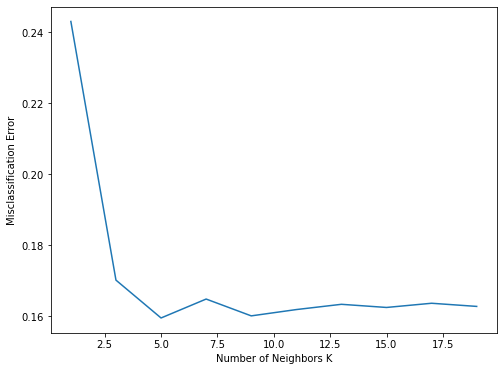

In [240]:
plt.figure(figsize=(8,6))
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [241]:
knn5=KNeighborsClassifier(n_neighbors=5)
knn5.fit(X_train,y_train)

KNeighborsClassifier()

In [242]:
ytrain_predict_knn5 = knn5.predict(X_train)
ytest_predict_knn5 = knn5.predict(X_test)

In [243]:
knn5.score(X_train, y_train)

0.8572697284953058

In [244]:
knn5.score(X_test, y_test)

0.8404381290704559

In [245]:
print(confusion_matrix(y_train, ytrain_predict_knn5))

[[6312  244]
 [ 881  445]]


In [246]:
print(confusion_matrix(y_test, ytest_predict_knn5))

[[2679  129]
 [ 410  160]]


In [247]:
print(classification_report(y_train, ytrain_predict_knn5))

              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92      6556
         1.0       0.65      0.34      0.44      1326

    accuracy                           0.86      7882
   macro avg       0.76      0.65      0.68      7882
weighted avg       0.84      0.86      0.84      7882



In [248]:
print(classification_report(y_test, ytest_predict_knn5))

              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91      2808
         1.0       0.55      0.28      0.37       570

    accuracy                           0.84      3378
   macro avg       0.71      0.62      0.64      3378
weighted avg       0.81      0.84      0.82      3378



AUC score and ROC curve for training dataset
AUC: 0.749


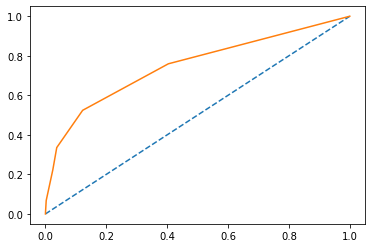

In [249]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = knn5.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for training dataset")
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC score and ROC curve for testing dataset
AUC: 0.715


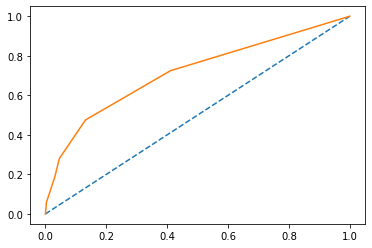

In [250]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = knn5.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for testing dataset")
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [251]:
scores_knn5_train = cross_val_score(knn5, X_train, y_train, cv=10)
scores_knn5_train

array([0.83523447, 0.82129278, 0.84898477, 0.84771574, 0.84390863,
       0.8464467 , 0.84010152, 0.79568528, 0.84137056, 0.83883249])

In [252]:
scores_knn5_test = cross_val_score(knn5, X_test, y_test, cv=10)
scores_knn5_test

array([0.83136095, 0.83136095, 0.83727811, 0.84023669, 0.82248521,
       0.82544379, 0.82544379, 0.82544379, 0.81305638, 0.80118694])

###  KNN model using GridSearchCV

In [253]:
param_grid = {
    'n_neighbors': [5,7,9],
    'weights' : ['uniform','distance'],
    'metric' : ['euclidean', 'manhattan'],
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
    
}

grid_search = GridSearchCV(estimator = knn, param_grid = param_grid, cv = 10, n_jobs=-1,scoring='f1')

In [254]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=19), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='f1')

In [255]:
grid_search.best_params_

{'algorithm': 'kd_tree',
 'metric': 'manhattan',
 'n_neighbors': 5,
 'weights': 'distance'}

In [256]:
best_grid = grid_search.best_estimator_
ytrain_predict_knncv = best_grid.predict(X_train)
ytest_predict_knncv = best_grid.predict(X_test)

In [257]:
best_grid.score(X_train, y_train)

0.8561278863232682

In [258]:
best_grid.score(X_test, y_test)

0.8354055654233274

In [259]:
confusion_matrix(y_train, ytrain_predict_knncv)

array([[6279,  277],
       [ 857,  469]], dtype=int64)

In [260]:
confusion_matrix(y_test, ytest_predict_knncv)

array([[2660,  148],
       [ 408,  162]], dtype=int64)

In [261]:
print(classification_report(y_train, ytrain_predict_knncv))

              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92      6556
         1.0       0.63      0.35      0.45      1326

    accuracy                           0.86      7882
   macro avg       0.75      0.66      0.68      7882
weighted avg       0.84      0.86      0.84      7882



In [262]:
print(classification_report(y_test, ytest_predict_knncv))

              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91      2808
         1.0       0.52      0.28      0.37       570

    accuracy                           0.84      3378
   macro avg       0.69      0.62      0.64      3378
weighted avg       0.81      0.84      0.81      3378



AUC score and ROC curve for training dataset
AUC: 0.765


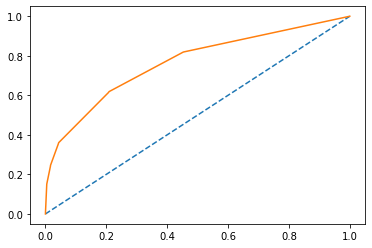

In [263]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for training dataset")
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC score and ROC curve for testing dataset
AUC: 0.725


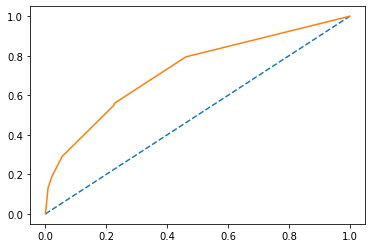

In [264]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for testing dataset")
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [265]:
scores_knncv_train = cross_val_score(best_grid, X_train, y_train, cv=10)
scores_knncv_train

array([0.84157161, 0.85171103, 0.85659898, 0.8464467 , 0.84263959,
       0.86040609, 0.84771574, 0.83121827, 0.84137056, 0.84771574])

In [266]:
scores_knncv_test = cross_val_score(best_grid, X_test, y_test, cv=10)
scores_knncv_test

array([0.83136095, 0.80473373, 0.80473373, 0.82248521, 0.78698225,
       0.79289941, 0.85502959, 0.81656805, 0.82789318, 0.79228487])

### KNN model over balanced dataset using SMOTE

In [267]:
knn.fit(X_train_res, y_train_res)

KNeighborsClassifier(n_neighbors=19)

In [268]:
ytrain_predict_knnsm = knn.predict(X_train_res)
ytest_predict_knnsm = knn.predict(X_test)

In [269]:
knn.score(X_train_res, y_train_res)

0.713849908480781

In [270]:
knn.score(X_test, y_test)

0.6669626998223801

In [271]:
confusion_matrix(y_train_res, ytrain_predict_knnsm)

array([[4370, 2186],
       [1566, 4990]], dtype=int64)

In [272]:
confusion_matrix(y_test, ytest_predict_knnsm)

array([[1851,  957],
       [ 168,  402]], dtype=int64)

In [273]:
print(classification_report(y_train_res, ytrain_predict_knnsm))

              precision    recall  f1-score   support

         0.0       0.74      0.67      0.70      6556
         1.0       0.70      0.76      0.73      6556

    accuracy                           0.71     13112
   macro avg       0.72      0.71      0.71     13112
weighted avg       0.72      0.71      0.71     13112



In [274]:
print(classification_report(y_test, ytest_predict_knnsm))

              precision    recall  f1-score   support

         0.0       0.92      0.66      0.77      2808
         1.0       0.30      0.71      0.42       570

    accuracy                           0.67      3378
   macro avg       0.61      0.68      0.59      3378
weighted avg       0.81      0.67      0.71      3378



AUC score and ROC curve for training dataset
AUC: 0.781


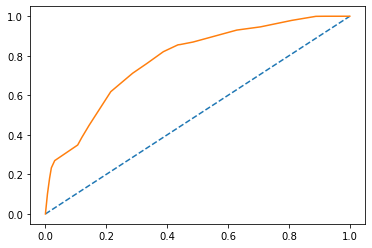

In [275]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = knn.predict_proba(X_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for training dataset")
auc = roc_auc_score(y_train_res, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC score and ROC curve for testing dataset
AUC: 0.738


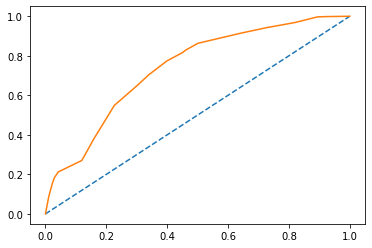

In [276]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = knn.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for testing dataset")
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [277]:
scores_knnsm_train = cross_val_score(knn, X_train_res, y_train_res, cv=10)
scores_knnsm_train

array([0.69588415, 0.71341463, 0.71167048, 0.72768879, 0.70480549,
       0.73150267, 0.70175439, 0.72006102, 0.73073989, 0.73302822])

In [278]:
scores_knnsm_test = cross_val_score(knn, X_test, y_test, cv=10)
scores_knnsm_test

array([0.84911243, 0.83431953, 0.84023669, 0.83431953, 0.83136095,
       0.82544379, 0.83136095, 0.82248521, 0.82492582, 0.83086053])

### Gaussian Naive Bayes

In [279]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [280]:
ytrain_predict_nb = nb.predict(X_train)
ytest_predict_nb = nb.predict(X_test)

In [281]:
nb.score(X_train, y_train)

0.28063943161634103

In [282]:
nb.score(X_test, y_test)

0.2898164594434577

In [283]:
print(confusion_matrix(y_train, ytrain_predict_nb)) 

[[ 961 5595]
 [  75 1251]]


In [284]:
print(confusion_matrix(y_test, ytest_predict_nb)) 

[[ 429 2379]
 [  20  550]]


In [285]:
print(classification_report(y_train, ytrain_predict_nb)) 

              precision    recall  f1-score   support

         0.0       0.93      0.15      0.25      6556
         1.0       0.18      0.94      0.31      1326

    accuracy                           0.28      7882
   macro avg       0.56      0.55      0.28      7882
weighted avg       0.80      0.28      0.26      7882



In [286]:
print(classification_report(y_test, ytest_predict_nb)) 

              precision    recall  f1-score   support

         0.0       0.96      0.15      0.26      2808
         1.0       0.19      0.96      0.31       570

    accuracy                           0.29      3378
   macro avg       0.57      0.56      0.29      3378
weighted avg       0.83      0.29      0.27      3378



AUC score and ROC curve for training dataset
AUC: 0.715


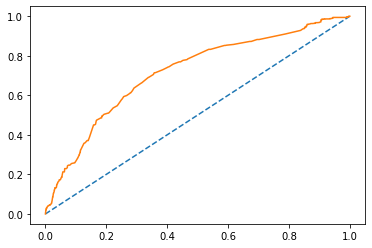

In [287]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = nb.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for training dataset")
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC score and ROC curve for testing dataset
AUC: 0.721


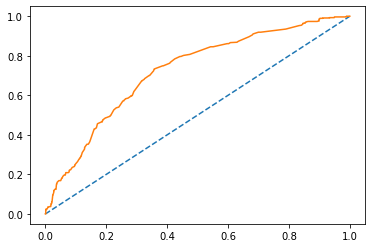

In [288]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = nb.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for testing dataset")
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [289]:
scores_nb_train = cross_val_score(nb, X_train, y_train, cv=10)
scores_nb_train

array([0.2712294 , 0.25475285, 0.29187817, 0.26522843, 0.26903553,
       0.30076142, 0.27284264, 0.28172589, 0.26522843, 0.30964467])

In [290]:
scores_nb_test = cross_val_score(nb, X_test, y_test, cv=10)
scores_nb_test

array([0.29289941, 0.28994083, 0.28106509, 0.31656805, 0.28994083,
       0.26627219, 0.29881657, 0.27218935, 0.30563798, 0.27002967])

### Gaussian Naive Bayes over balanced data using SMOTE

In [291]:
nb = GaussianNB()
nb.fit(X_train_res, y_train_res)

GaussianNB()

In [292]:
ytrain_predict_nbsm = nb.predict(X_train_res)
ytest_predict_nbsm = nb.predict(X_test)

In [293]:
nb.score(X_train_res, y_train_res)
nb.score(X_test, y_test)

0.2975133214920071

In [294]:
print(confusion_matrix(y_train_res, ytrain_predict_nbsm))

[[1046 5510]
 [ 311 6245]]


In [295]:
print(confusion_matrix(y_test, ytest_predict_nbsm))

[[ 465 2343]
 [  30  540]]


In [296]:
print(classification_report(y_train_res, ytrain_predict_nbsm))

              precision    recall  f1-score   support

         0.0       0.77      0.16      0.26      6556
         1.0       0.53      0.95      0.68      6556

    accuracy                           0.56     13112
   macro avg       0.65      0.56      0.47     13112
weighted avg       0.65      0.56      0.47     13112



In [297]:
print(classification_report(y_test, ytest_predict_nbsm))

              precision    recall  f1-score   support

         0.0       0.94      0.17      0.28      2808
         1.0       0.19      0.95      0.31       570

    accuracy                           0.30      3378
   macro avg       0.56      0.56      0.30      3378
weighted avg       0.81      0.30      0.29      3378



AUC score and ROC curve for training dataset
AUC: 0.723


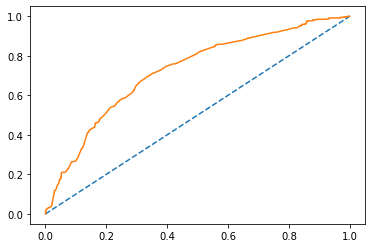

In [298]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = nb.predict_proba(X_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for training dataset")
auc = roc_auc_score(y_train_res, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC score and ROC curve for testing dataset
AUC: 0.708


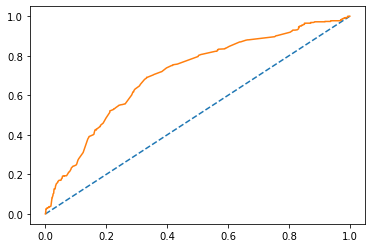

In [299]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = nb.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for testing dataset")
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [300]:
scores_nbsm_train = cross_val_score(nb, X_train_res, y_train_res, cv=10)
scores_nbsm_train

array([0.53887195, 0.52362805, 0.5682685 , 0.55682685, 0.5553013 ,
       0.57284516, 0.55301297, 0.55453852, 0.55758963, 0.58047292])

In [301]:
scores_nbsm_test = cross_val_score(nb, X_test, y_test, cv=10)
scores_nbsm_test

array([0.29289941, 0.28994083, 0.28106509, 0.31656805, 0.28994083,
       0.26627219, 0.29881657, 0.27218935, 0.30563798, 0.27002967])

### Random Forest

In [302]:
rf=RandomForestClassifier(random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [303]:
ytrain_predict_rf = rf.predict(X_train)
ytest_predict_rf = rf.predict(X_test)

In [304]:
rf.score(X_train, y_train)

0.8633595534128394

In [305]:
rf.score(X_test, y_test)

0.8431024274718768

In [306]:
print(metrics.confusion_matrix(y_train, ytrain_predict_rf))

[[6428  128]
 [ 949  377]]


In [307]:
print(metrics.confusion_matrix(y_test, ytest_predict_rf))

[[2724   84]
 [ 446  124]]


In [308]:
print(metrics.classification_report(y_train, ytrain_predict_rf))

              precision    recall  f1-score   support

         0.0       0.87      0.98      0.92      6556
         1.0       0.75      0.28      0.41      1326

    accuracy                           0.86      7882
   macro avg       0.81      0.63      0.67      7882
weighted avg       0.85      0.86      0.84      7882



In [309]:
print(metrics.classification_report(y_test, ytest_predict_rf))

              precision    recall  f1-score   support

         0.0       0.86      0.97      0.91      2808
         1.0       0.60      0.22      0.32       570

    accuracy                           0.84      3378
   macro avg       0.73      0.59      0.62      3378
weighted avg       0.81      0.84      0.81      3378



AUC score and ROC curve for training dataset
AUC: 0.707


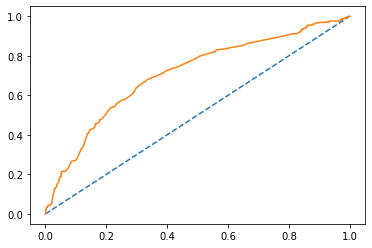

In [310]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = nb.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for training dataset")
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC score and ROC curve for testing dataset
AUC: 0.708


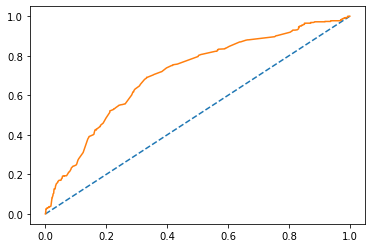

In [311]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = nb.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for testing dataset")
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

### Random Forest model over balanced dataset

In [312]:
rf.fit(X_train_res, y_train_res)

RandomForestClassifier(random_state=1)

In [313]:
ytrain_predict_rfsm = rf.predict(X_train_res)
ytest_predict_rfsm = rf.predict(X_test)

In [314]:
rf.score(X_train_res, y_train_res)

0.7457291031116534

In [315]:
rf.score(X_test, y_test)

0.7104795737122558

In [316]:
print(metrics.confusion_matrix(y_train_res, ytrain_predict_rfsm))

[[4763 1793]
 [1541 5015]]


In [317]:
print(metrics.confusion_matrix(y_test, ytest_predict_rfsm))

[[1991  817]
 [ 161  409]]


In [318]:
print(metrics.classification_report(y_train_res, ytrain_predict_rfsm))

              precision    recall  f1-score   support

         0.0       0.76      0.73      0.74      6556
         1.0       0.74      0.76      0.75      6556

    accuracy                           0.75     13112
   macro avg       0.75      0.75      0.75     13112
weighted avg       0.75      0.75      0.75     13112



In [319]:
print(metrics.classification_report(y_test, ytest_predict_rfsm))

              precision    recall  f1-score   support

         0.0       0.93      0.71      0.80      2808
         1.0       0.33      0.72      0.46       570

    accuracy                           0.71      3378
   macro avg       0.63      0.71      0.63      3378
weighted avg       0.83      0.71      0.74      3378



### Bagging

In [320]:
Bagging=BaggingClassifier(base_estimator=rf,random_state=1)
Bagging.fit(X_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(random_state=1),
                  random_state=1)

In [321]:
ytrain_predict_bagging = Bagging.predict(X_train)

In [322]:
ytest_predict_bagging = Bagging.predict(X_test)

In [323]:
Bagging.score(X_train, y_train)

0.862471453945699

In [324]:
Bagging.score(X_test, y_test)

0.8428063943161634

In [325]:
print(metrics.confusion_matrix(y_train, ytrain_predict_bagging))

[[6417  139]
 [ 945  381]]


In [326]:
print(metrics.confusion_matrix(y_test, ytest_predict_bagging))

[[2720   88]
 [ 443  127]]


In [327]:
print(metrics.classification_report(y_train, ytrain_predict_bagging))

              precision    recall  f1-score   support

         0.0       0.87      0.98      0.92      6556
         1.0       0.73      0.29      0.41      1326

    accuracy                           0.86      7882
   macro avg       0.80      0.63      0.67      7882
weighted avg       0.85      0.86      0.84      7882



In [328]:
print(metrics.classification_report(y_test, ytest_predict_bagging))

              precision    recall  f1-score   support

         0.0       0.86      0.97      0.91      2808
         1.0       0.59      0.22      0.32       570

    accuracy                           0.84      3378
   macro avg       0.73      0.60      0.62      3378
weighted avg       0.81      0.84      0.81      3378



AUC score and ROC curve for training dataset
AUC: 0.833


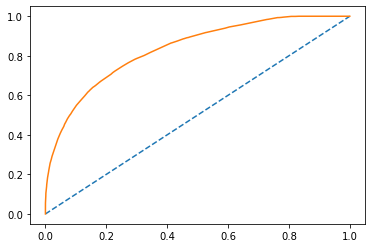

In [329]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = Bagging.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for training dataset")
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC score and ROC curve for testing dataset
AUC: 0.794


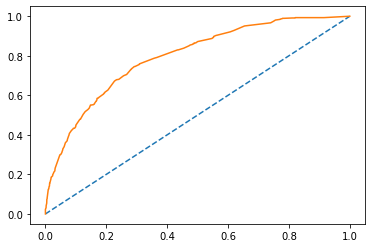

In [330]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = Bagging.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for testing dataset")
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [331]:
scores_bagging_train = cross_val_score(Bagging, X_train, y_train, cv=10)
scores_bagging_train

array([0.85297845, 0.85931559, 0.85786802, 0.85025381, 0.85025381,
       0.86167513, 0.85659898, 0.84263959, 0.85152284, 0.84771574])

In [332]:
scores_bagging_test = cross_val_score(Bagging, X_test, y_test, cv=10)
scores_bagging_test

array([0.83727811, 0.85207101, 0.84911243, 0.83727811, 0.82544379,
       0.84023669, 0.83727811, 0.83136095, 0.83086053, 0.83086053])

### Bagging on balanced dataset

In [333]:
Bagging.fit(X_train_res, y_train_res)

BaggingClassifier(base_estimator=RandomForestClassifier(random_state=1),
                  random_state=1)

In [334]:
ytrain_predict_bagging_sm = Bagging.predict(X_train_res)
ytest_predict_bagging_sm= Bagging.predict(X_test)

In [335]:
Bagging.score(X_train_res, y_train_res)

0.7450427089688835

In [336]:
Bagging.score(X_test, y_test)

0.7181764357608053

In [337]:
print(metrics.confusion_matrix(y_train_res, ytrain_predict_bagging_sm))

[[4865 1691]
 [1652 4904]]


In [338]:
print(metrics.confusion_matrix(y_test, ytest_predict_bagging_sm))

[[2032  776]
 [ 176  394]]


In [339]:
print(metrics.classification_report(y_train_res, ytrain_predict_bagging_sm))

              precision    recall  f1-score   support

         0.0       0.75      0.74      0.74      6556
         1.0       0.74      0.75      0.75      6556

    accuracy                           0.75     13112
   macro avg       0.75      0.75      0.75     13112
weighted avg       0.75      0.75      0.75     13112



In [340]:
print(metrics.classification_report(y_test, ytest_predict_bagging_sm))

              precision    recall  f1-score   support

         0.0       0.92      0.72      0.81      2808
         1.0       0.34      0.69      0.45       570

    accuracy                           0.72      3378
   macro avg       0.63      0.71      0.63      3378
weighted avg       0.82      0.72      0.75      3378



AUC score and ROC curve for training dataset
AUC: 0.833


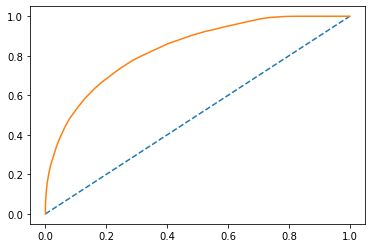

In [341]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = Bagging.predict_proba(X_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for training dataset")
auc = roc_auc_score(y_train_res, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC score and ROC curve for testing dataset
AUC: 0.785


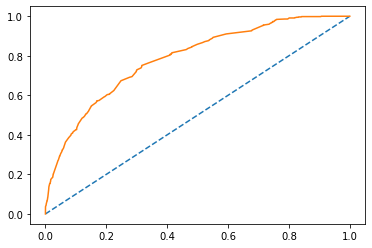

In [342]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = Bagging.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for testing dataset")
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [343]:
scores_bagging_sm_train = cross_val_score(Bagging, X_train_res, y_train_res, cv=10)
scores_bagging_sm_train

array([0.73246951, 0.72332317, 0.73302822, 0.75667429, 0.7208238 ,
       0.74752098, 0.71548436, 0.73531655, 0.74828375, 0.75362319])

In [344]:
scores_bagging_sm_test = cross_val_score(Bagging, X_test, y_test, cv=10)
scores_bagging_sm_test

array([0.83727811, 0.85207101, 0.84911243, 0.83727811, 0.82544379,
       0.84023669, 0.83727811, 0.83136095, 0.83086053, 0.83086053])

### Ada Boost

In [345]:
adb = AdaBoostClassifier(random_state=1)
adb.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

In [346]:
ytrain_predict_adb = adb.predict(X_train)
ytest_predict_adb = adb.predict(X_test)

In [347]:
adb.score(X_train, y_train)

0.8388733823902563

In [348]:
adb.score(X_test, y_test)

0.8389579632918887

In [349]:
print(metrics.confusion_matrix(y_train, ytrain_predict_adb))

[[6453  103]
 [1167  159]]


In [350]:
print(metrics.confusion_matrix(y_test, ytest_predict_adb))

[[2761   47]
 [ 497   73]]


In [351]:
print(metrics.classification_report(y_train, ytrain_predict_adb))

              precision    recall  f1-score   support

         0.0       0.85      0.98      0.91      6556
         1.0       0.61      0.12      0.20      1326

    accuracy                           0.84      7882
   macro avg       0.73      0.55      0.56      7882
weighted avg       0.81      0.84      0.79      7882



In [352]:
print(metrics.classification_report(y_test, ytest_predict_adb))

              precision    recall  f1-score   support

         0.0       0.85      0.98      0.91      2808
         1.0       0.61      0.13      0.21       570

    accuracy                           0.84      3378
   macro avg       0.73      0.56      0.56      3378
weighted avg       0.81      0.84      0.79      3378



AUC score and ROC curve for training dataset
AUC: 0.750


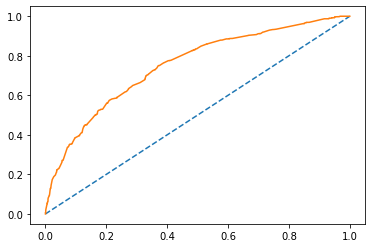

In [353]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = adb.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for training dataset")
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC score and ROC curve for testing dataset
AUC: 0.752


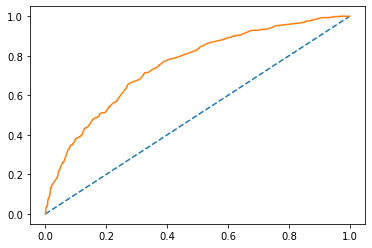

In [354]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = adb.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for testing dataset")
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [355]:
scores_adb_train = cross_val_score(adb, X_train, y_train, cv=10)
scores_adb_train

array([0.8365019 , 0.84030418, 0.84517766, 0.84010152, 0.83883249,
       0.84517766, 0.83756345, 0.82994924, 0.83502538, 0.84390863])

In [356]:
scores_adb_test = cross_val_score(adb, X_test, y_test, cv=10)
scores_adb_test

array([0.82544379, 0.82544379, 0.83727811, 0.83727811, 0.84023669,
       0.83136095, 0.83431953, 0.83727811, 0.83679525, 0.84569733])

### Ada Boost on balanced dataset

In [357]:
adb.fit(X_train_res,y_train_res)

AdaBoostClassifier(random_state=1)

In [358]:
ytrain_predict_adbsm = adb.predict(X_train_res)
ytest_predict_adbsm = adb.predict(X_test)

In [359]:
adb.score(X_train_res, y_train_res)

0.6785387431360586

In [360]:
adb.score(X_test, y_test)

0.6856127886323268

In [361]:
print(metrics.confusion_matrix(y_train_res, ytrain_predict_adbsm))

[[4456 2100]
 [2115 4441]]


In [362]:
print(metrics.confusion_matrix(y_test, ytest_predict_adbsm))

[[1919  889]
 [ 173  397]]


In [363]:
print(metrics.classification_report(y_train_res, ytrain_predict_adbsm))

              precision    recall  f1-score   support

         0.0       0.68      0.68      0.68      6556
         1.0       0.68      0.68      0.68      6556

    accuracy                           0.68     13112
   macro avg       0.68      0.68      0.68     13112
weighted avg       0.68      0.68      0.68     13112



In [364]:
print(metrics.classification_report(y_test, ytest_predict_adbsm))

              precision    recall  f1-score   support

         0.0       0.92      0.68      0.78      2808
         1.0       0.31      0.70      0.43       570

    accuracy                           0.69      3378
   macro avg       0.61      0.69      0.61      3378
weighted avg       0.81      0.69      0.72      3378



AUC score and ROC curve for training dataset
AUC: 0.751


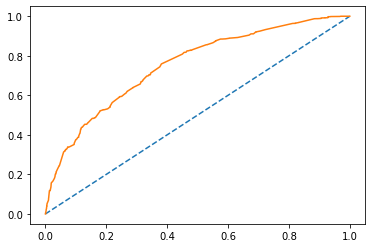

In [365]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = adb.predict_proba(X_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for training dataset")
auc = roc_auc_score(y_train_res, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC score and ROC curve for testing dataset
AUC: 0.747


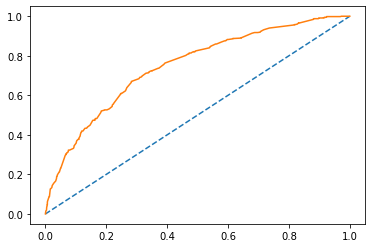

In [366]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = adb.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for testing dataset")
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [367]:
scores_adb_sm_train = cross_val_score(adb, X_train_res, y_train_res, cv=10)
scores_adb_sm_train

array([0.67454268, 0.66387195, 0.67276888, 0.67963387, 0.66437834,
       0.70633105, 0.65751335, 0.68573608, 0.69031274, 0.6979405 ])

In [368]:
scores_adb_sm_test = cross_val_score(adb, X_test, y_test, cv=10)
scores_adb_sm_test

array([0.82544379, 0.82544379, 0.83727811, 0.83727811, 0.84023669,
       0.83136095, 0.83431953, 0.83727811, 0.83679525, 0.84569733])

### Gradient Boosting

In [369]:
gb = GradientBoostingClassifier(random_state=1)
gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=1)

In [370]:
ytrain_predict_gb = gb.predict(X_train)
ytest_predict_gb = gb.predict(X_test)

In [371]:
gb.score(X_train, y_train)

0.8477543770616595

In [372]:
gb.score(X_test, y_test)

0.8413262285375962

In [373]:
print(metrics.confusion_matrix(y_train, ytrain_predict_gb))

[[6456  100]
 [1100  226]]


In [374]:
print(metrics.confusion_matrix(y_test, ytest_predict_gb))

[[2751   57]
 [ 479   91]]


In [375]:
print(metrics.classification_report(y_train, ytrain_predict_gb))

              precision    recall  f1-score   support

         0.0       0.85      0.98      0.91      6556
         1.0       0.69      0.17      0.27      1326

    accuracy                           0.85      7882
   macro avg       0.77      0.58      0.59      7882
weighted avg       0.83      0.85      0.81      7882



In [376]:
print(metrics.classification_report(y_test, ytest_predict_gb))

              precision    recall  f1-score   support

         0.0       0.85      0.98      0.91      2808
         1.0       0.61      0.16      0.25       570

    accuracy                           0.84      3378
   macro avg       0.73      0.57      0.58      3378
weighted avg       0.81      0.84      0.80      3378



AUC score and ROC curve for training dataset
AUC: 0.782


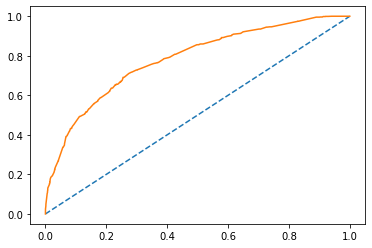

In [377]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = gb.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for training dataset")
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC score and ROC curve for testing dataset
AUC: 0.774


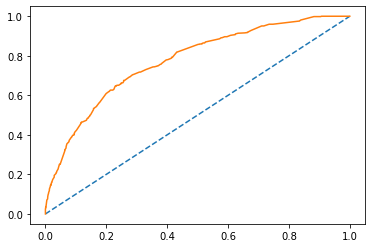

In [378]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = gb.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for testing dataset")
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [379]:
scores_gb_train = cross_val_score(gb, X_train, y_train, cv=10)
scores_gb_train

array([0.83523447, 0.84410646, 0.84771574, 0.84263959, 0.84263959,
       0.85406091, 0.84390863, 0.83375635, 0.82994924, 0.83629442])

In [380]:
scores_gb_test = cross_val_score(gb, X_test, y_test, cv=10)
scores_gb_test

array([0.83727811, 0.84319527, 0.84023669, 0.84023669, 0.83136095,
       0.84023669, 0.84023669, 0.84023669, 0.83976261, 0.84272997])

### Gradient Boosting on balanced dataset

In [381]:
gb.fit(X_train_res, y_train_res)

GradientBoostingClassifier(random_state=1)

In [382]:
ytrain_predict_gbsm = gb.predict(X_train_res)
ytest_predict_gbsm = gb.predict(X_test)

In [383]:
gb.score(X_train_res, y_train_res)

0.7177394752898109

In [384]:
gb.score(X_test, y_test)

0.7178804026050918

In [385]:
print(metrics.confusion_matrix(y_train_res, ytrain_predict_gbsm))

[[4840 1716]
 [1985 4571]]


In [386]:
print(metrics.confusion_matrix(y_test, ytest_predict_gbsm))

[[2043  765]
 [ 188  382]]


In [387]:
print(metrics.classification_report(y_train_res, ytrain_predict_gbsm))

              precision    recall  f1-score   support

         0.0       0.71      0.74      0.72      6556
         1.0       0.73      0.70      0.71      6556

    accuracy                           0.72     13112
   macro avg       0.72      0.72      0.72     13112
weighted avg       0.72      0.72      0.72     13112



In [388]:
print(metrics.classification_report(y_test, ytest_predict_gbsm))

              precision    recall  f1-score   support

         0.0       0.92      0.73      0.81      2808
         1.0       0.33      0.67      0.44       570

    accuracy                           0.72      3378
   macro avg       0.62      0.70      0.63      3378
weighted avg       0.82      0.72      0.75      3378



AUC score and ROC curve for training dataset
AUC: 0.785


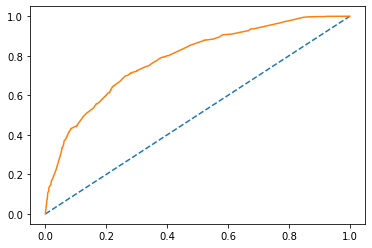

In [389]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = gb.predict_proba(X_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for training dataset")
auc = roc_auc_score(y_train_res, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC score and ROC curve for testing dataset
AUC: 0.769


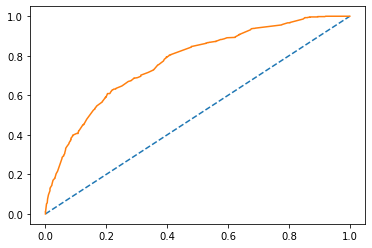

In [390]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = gb.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for testing dataset")
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [391]:
scores_gb_sm_train = cross_val_score(gb, X_train_res, y_train_res, cv=10)
scores_gb_sm_train

array([0.70121951, 0.69359756, 0.69641495, 0.71700992, 0.70327994,
       0.71929825, 0.69107551, 0.71243326, 0.72997712, 0.72921434])

In [392]:
scores_gb_sm_test = cross_val_score(gb, X_test, y_test, cv=10)
scores_gb_sm_test

array([0.83727811, 0.84319527, 0.84023669, 0.84023669, 0.83136095,
       0.84023669, 0.84023669, 0.84023669, 0.83976261, 0.84272997])

In [407]:
GB_importance = pd.DataFrame(gb.feature_importances_, index = ['Churn','City_Tier','CC_Contacted_LY','Payment','Gender','Service_Score','Account_user_count','account_segment','CC_Agent_Score','Marital_Status','rev_per_month','Complain_ly','rev_growth_yoy','coupon_used_for_payment','Day_Since_CC_connect','cashback','Login_device'], columns=['importance'])

In [408]:
GB_importance.sort_values('importance', axis=0, ascending=False, inplace=True)
GB_importance

,importance
Complain_ly,0.381076
Marital_Status,0.167364
account_segment,0.090820
CC_Agent_Score,0.081959
cashback,0.064034
Gender,0.046813
Login_device,0.039775
City_Tier,0.036108
coupon_used_for_payment,0.032451
Payment,0.019412


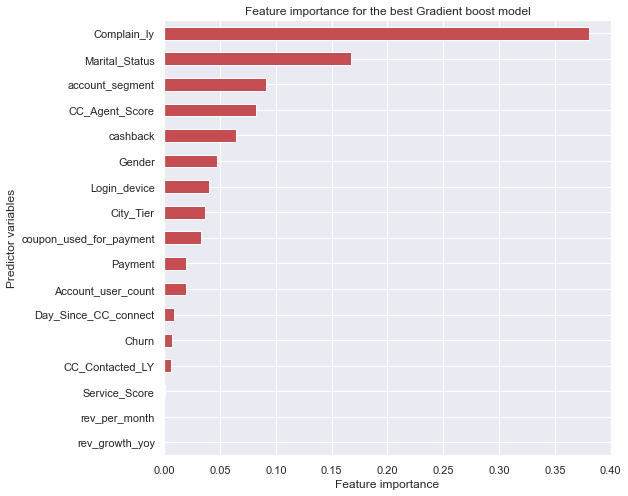

In [413]:
## plotting graph
sns.set()
GB_importance = GB_importance.sort_values(by='importance')
GB_importance.plot(kind='barh', color = 'r', figsize=(8,8), legend=None)
plt.title("Feature importance for the best Gradient boost model")
plt.xlabel("Feature importance")
plt.ylabel("Predictor variables")
plt.show();